# Muestreo

Muchas veces es imposible acceder a los datos completos de una población entera, por ser una población demasiado grande o simplemente porque no toda la población original es visible directamente.

Es por ello que recurrimos al muestreo, tomamos una muestra *significativa* de la población original y a partir de ella calculamos los estadísticos necesarios. 

Por ejemplo si queremos calcular la media de altura de la población española podemos elegir al azar a varias personas, medir su altura y calcular la media. Podríamos asumir que esa es la media de la población. Pero, ¿cómo de real es esa media? 
* Si mi muestra al azar la hago seleccionando a miembros de varios equipos de baloncesto, la media seguramente me saldrá **sesgada**, su media será mayor de lo esperado.
* Si la muestra la hago partiendo de un grupo pequeño cabe esperar que tenga una gran **varianza**, es decir, si repito el experimento con otro grupo de personas igual de reducido el valor será bastante diferente.



![](pics/sesgo_varianza.png)

## Sesgo

El sesgo (en inglés bias) nos dice la diferencia entre el valor del estimador esperado y el estimador real.

### Varianza como estimador sesgado

Por ejemplo, la varianza de una variable muestreada es un estimador sesgado.
Recordemos, la varianza se definía como:
\\[ Var[x] =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2 \\]

Comprobemos si esto es cierto, supongamos que tenemos una distribución uniforme con media 0 y varianza 4. Si tomamos una población de 5 elementos, ¿cual es la varianza que típicamente?. Podemos repetir este experimento 10.000 veces para comprobar su resultado:

In [18]:
n<-5
r <- rnorm(n, mean=0,sd=2)
r
myVar(r)

[1] -3.205612  2.268588 -1.344924  2.540760  1.706985

[1] 5.165528

In [14]:
options(repr.plot.height=5,repr.plot.width=8 , repr.plot.res = 400)
set.seed(1)

myVar<-function(X){
    v<-0
    m<-mean(X)
    for (xi in X){
        v<-v+(xi-m)^2
    }
    v/length(X)
}

n<-5

varianzaEstimada<-c()
for (i in 1:10000){
    r <- rnorm(n, mean=0,sd=2)
    varianzaEstimada<-c(varianzaEstimada,myVar(r))
}
print(paste("La varianza esperada es:",mean(varianzaEstimada)))

[1] "La varianza esperada es: 3.24246649004265"


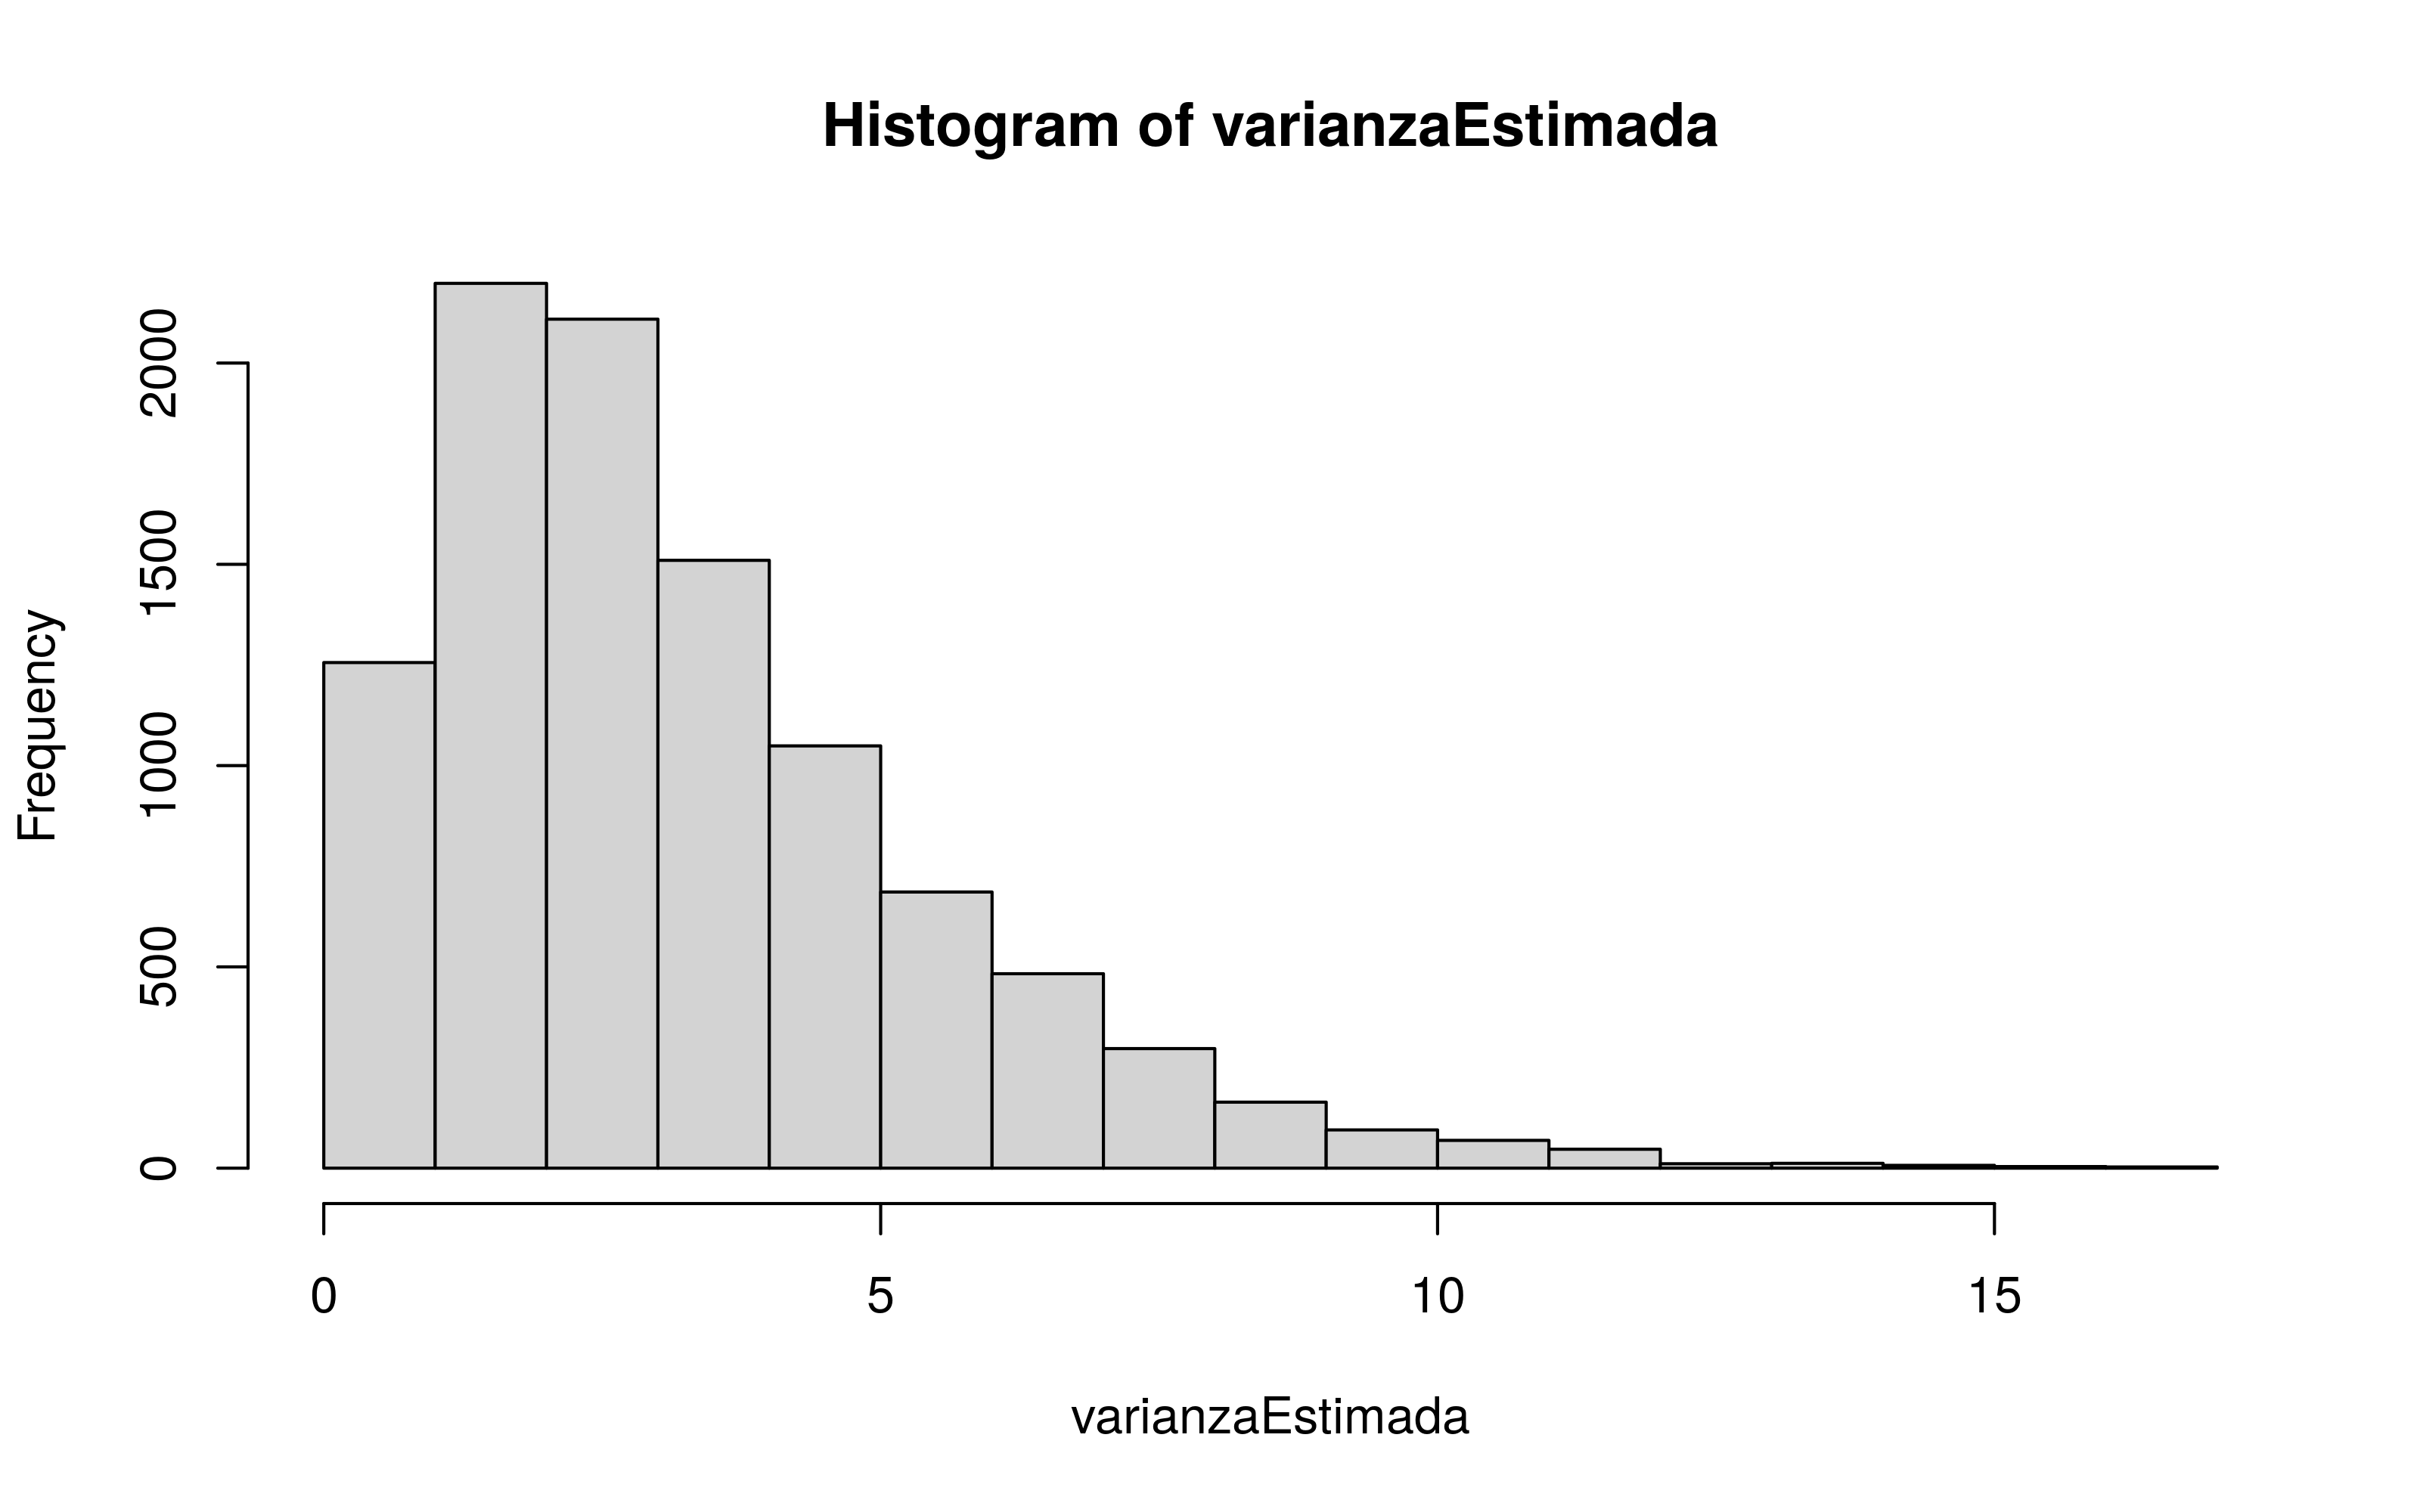

In [15]:
hist(varianzaEstimada)

Como vemos obtenemos una varianza cercana a 3.242, cuando sabemos que la varianza es realmente 4.
Lo que ocurre es que el estimador de la varianza está sesgado, hay que modificar su fórmula multiplicándolo por $\frac{N}{N-1}$ donde $N$ es el número de elementos de la población muestreada. En nuestro caso N=5, así que:
\\[
\frac{5}{5-1}·3.242=4.05
\\]
Lo cual da un valor mucho más próximo al esperado.
Así pues hay que reescribir la fórmula de la varianza de la siguiente forma:
\\[ Var[x] =  \frac{1}{N-1} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2 \\]

Esta es la fórmula que utiliza R para la función *var()*


### Sesgo de selección

Es us sesgo en el que hay un error en la selección de elementos de la población. En nuestro ejemplo anterior el sesgo de selección sería ir a coger jugadores de baloncesto esperando que sean una muestra representativa de la altura española.

Es un error sistemático que no depende del azar, es necesario identificarlo y tratar de neutraliza su efecto.

#### Sesgo del superviviente

Es un tipo de sesgo de selección. Muchas veces los datos que disponemos no representan una parte fiable de la población que queremos medir, sino una parte de aquellos que han superado ciertos filtros.

Ejemplo: https://xkcd.com/1827/

Durante la segunda guerra mundial los aliados se enfrentaron con el problema de que muchos de sus aviones caian en combate. 
Una solución era poner más blindaje en ciertas partes estratégicas del avión, en las que sufrían más daño. Hicieron un estudio estadístico de las zonas más dañadas por el fuego nazi. Principalmente había más agujeros de bala en la parte central y en los extremos de las alas tal y como muestra la siguiente imagen de la [Wikipedia](https://en.wikipedia.org/wiki/Survivorship_bias#/media/File:Survivorship-bias.png).
![](https://upload.wikimedia.org/wikipedia/commons/9/98/Survivorship-bias.png)

Entre el ejercito empezó una corriente que sugería añadir más blindaje a las zonas donde había más daños. ¿Sería eso una buena idea?

El estadista Abraham Wald recomendó exactamente lo contrario, podríamos asumir que el fuego dañaba por igual todas las partes del avión, pero los aviones que veiamos eran aquellos que a pesar de ser alcanzados podían haber continuado volando. 

Así pues había que aumentar el blindaje en las zonas donde no había marcas de disparos porque esos son los aviones que no habían sobrevido al viaje.

## Sesgo por omisión de variable

Este sesgo ocurre cuando creamos un modelo incorrecto porque no hemos tenido en cuenta variables importantes.

#### Ejemplo: Brecha de género

Un estudio llevado a cabo en 2007 en EEUU por el departamento de trabajo calculó que la brecha de género, el salario, entre hombres y mujeres era de un 20.4%. Es decir, las mujeres en media ganan un 20.4% menos que los hombres. Pero si tenemos en cuenta variables ocultas como: interrupción de la carrera profesional, edad, número de hijos, estudios. En ese caso la brecha de género podría estar entre el 4.8% y el 7.1%.

Un detallado análisis de este estudio se encuentra público [aquí](https://www.shrm.org/hr-today/public-policy/hr-public-policy-issues/Documents/Gender%20Wage%20Gap%20Final%20Report.pdf)

### Paradoja de Simpson

La paradoja de Simpson o el efecto Yule-Simpson, es un fenómeno en el cual una tendencia aparece en grupos diferentes pero cambia completamente cuando esos grupos son combinados.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



[1] "La correlación de x,y, sin tener en cuenta los grupos es: -0.790209749998602"
[1] "La correlación de x,y, para el grupo A: 1"
[1] "La correlación de x,y, para el grupo B: 1"


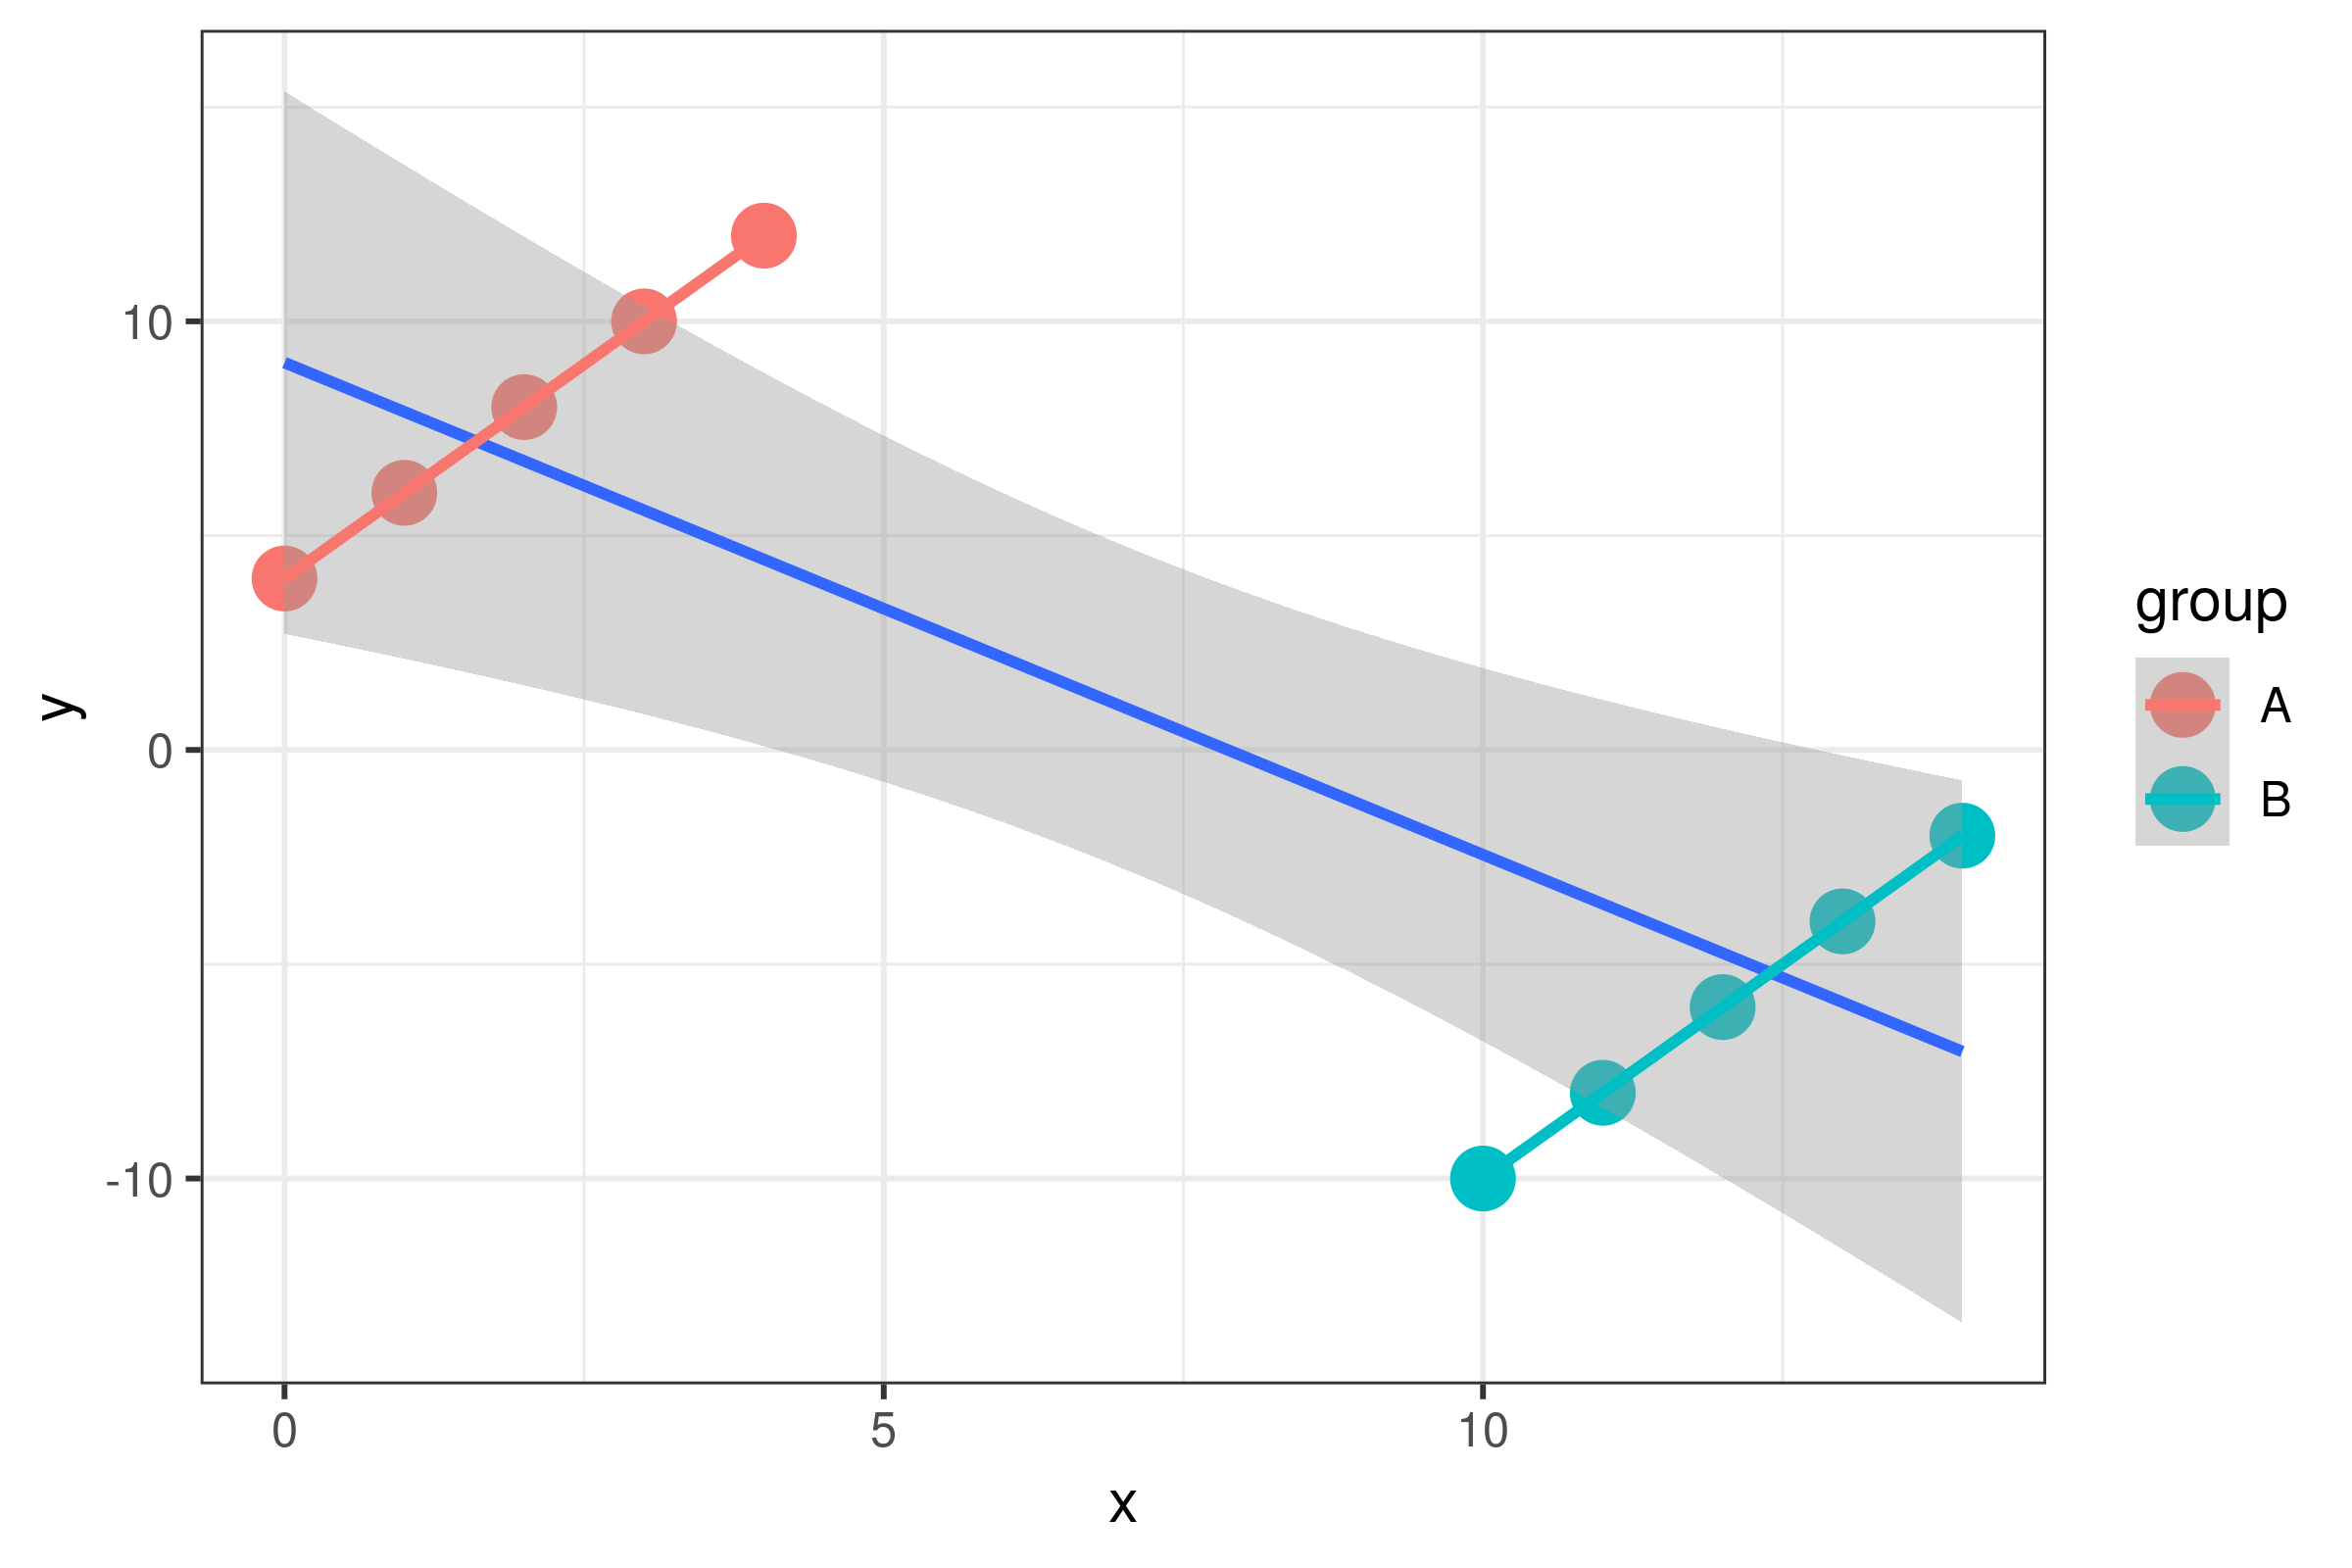

In [20]:
x1<-0:4
y1<-2*x1+4

x2<-10:14
y2<-2*x2-30

df<-data.frame(x=c(x1,x2),y=c(y1,y2),group=rep(c("A","B"),each=length(x1)))
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(data=df,aes(x,y))+geom_point(aes(color=group),size=5)+
 geom_smooth(method = 'lm')+
 geom_smooth(method = 'lm',aes(color=group))+
 theme_bw()

print(paste("La correlación de x,y, sin tener en cuenta los grupos es:",cor(df$x,df$y)))
print(paste("La correlación de x,y, para el grupo A:",cor(x1,y1)))
print(paste("La correlación de x,y, para el grupo B:",cor(x2,y2)))

### Ejemplo: Timo vacunas COVID:

http://ramblalibre.com/2021/07/05/las-personas-completamente-timo-vacunadas-tienen-un-885-mas-de-probabilidades-de-morir-debido-a-covid-19/


![](https://i1.wp.com/dailyexpose.co.uk/wp-content/uploads/2021/07/image-24.png?resize=768%2C242&ssl=1)

*Según la tabla anterior, podemos ver que de los 53,822 casos confirmados de la variante Delta Covid en personas que no estaban vacunadas, 831 se presentaron a la atención de emergencia, lo que resultó en un ingreso hospitalario durante la noche. Esto representa el 1,54% de los casos confirmados en personas no vacunadas.*

*Sin embargo, de los 7.235 casos confirmados de la variante Delta en personas que estaban completamente vacunadas, 190 acudieron a la atención de emergencia, lo que resultó en una hospitalización durante la noche. Esto representa el 2,6% de los casos confirmados en personas que están completamente vacunadas.*

*Estos datos, que han sido publicados por Public Health England, nos muestran que las personas que han recibido dos dosis de una vacuna Covid-19 tienen un 70,1% más de posibilidades de ser hospitalizadas con la supuesta variante Delta Covid que las personas que no están vacunadas.*

Como veis a continuación los números son reales:

In [21]:
no_vacunados <- 831/53822
paste("Porcentaje de hospitalizados NO vacunados", round(no_vacunados*100,2))

si_vacunados <- 190/7235
paste("Porcentaje de hospitalizados SI vacunados", round(si_vacunados*100,2))

paste("Los vacunados tienen",round(si_vacunados/no_vacunados-1,3)*100,'% más posibilidades de acabar hospitalizados')

[1] "Porcentaje de hospitalizados NO vacunados 1.54"

[1] "Porcentaje de hospitalizados SI vacunados 2.63"

[1] "Los vacunados tienen 70.1 % más posibilidades de acabar hospitalizados"

Pero si dividimos por edad los resultados son otros:

In [22]:
no_vacunados_menores_50 <- 695/3689
no_vacunados_mayores_50 <- 136/976
paste("Porcentaje de hospitalizados NO vacunados menores de 50 ", round(no_vacunados_menores_50*100,2))
paste("Porcentaje de hospitalizados NO vacunados mayores de 50 ", round(no_vacunados_mayores_50*100,2))


si_vacunados_menores_50 <- 190/52846
si_vacunados_mayores_50 <- 27/3546
paste("Porcentaje de hospitalizados SI vacunados menores de 50 ", round(si_vacunados_menores_50*100,2))
paste("Porcentaje de hospitalizados SI vacunados mayores de 50 ", round(si_vacunados_mayores_50*100,2))


paste("Los vacunados menores de 50 tienen",round(no_vacunados_menores_50/si_vacunados_menores_50-1,3)*100,'% menos posibilidades de acabar hospitalizados')
paste("Los vacunados mmayores de 50 tienen",round(no_vacunados_mayores_50/si_vacunados_mayores_50-1,3)*100,'% menos posibilidades de acabar hospitalizados')

[1] "Porcentaje de hospitalizados NO vacunados menores de 50  18.84"

[1] "Porcentaje de hospitalizados NO vacunados mayores de 50  13.93"

[1] "Porcentaje de hospitalizados SI vacunados menores de 50  0.36"

[1] "Porcentaje de hospitalizados SI vacunados mayores de 50  0.76"

[1] "Los vacunados menores de 50 tienen 5140 % menos posibilidades de acabar hospitalizados"

[1] "Los vacunados mmayores de 50 tienen 1730.1 % menos posibilidades de acabar hospitalizados"

### Ejemplo: Relación entre precio y demanda

Este ejemplo ha sido sacado de [statslife](https://www.statslife.org.uk/the-statistics-dictionary/2012-simpson-s-paradox-a-cautionary-tale-in-advanced-analytics).
La curva entre precio y demanda siempre debería ser una curva decreciente, a mayor precio menor demanda. Pero si no se eligen bien los datos que utilizamos para el análisis podrían salir resultados diferentes.

Por ejemplo en la siguiente figura se puede ver un ejemplo de como a medida que el precio (en lorgaritmo) aumenta, también lo hace la demanda (en logaritmo). Se observa una ligera tendencia positiva.
![](./pics/simpsons-paradox-del5.jpg)

En cambio si observamos la distribución en el tiempo de la demanda y del precio, vemos como cuando el precio sube, la demanda baja. Pero además se observa que hay una tendencia a la baja generalizada tanto del precio como de la demanda.
![](./pics/simpsons-paradox-del6.jpg)

Este comportamiento de bajada generalizada sugiere que deberíamos dividir el análisis en diferentes grupos de semanas. El motivo es que al estar bajando la demanda por causas ajenas al precio nos obliga a tratar con periodos de tiempo donde la demanda solo dependa de nuestro precio y no de una tendencia generalizada que no podemos controlar con el precio.
![](./pics/simpsons-paradox-del7.jpg)

En este caso se ve como al separar los intervalos en semanas la pendiente cambia de signo. A mayor precio, menor demanda. La siguiente tabla muestra la pendiente y el coeficiente de determinación $R^2$:

| Periodo | Pendiente | $R^2$ |
| - | - | - |
| Todas las semanas | 0.45 | <0.01 |
| Semanas 1-75   | -3.4 | 0.24 |
| Semanas 76-125 | -3.2 | 0.28 |
| Semanas 126-156   | -2.7 | 0.23 |



## Varianza 

La varianza de un estimador nos dice cuan de fiable, o cuanto error, nuestro estimador puede tener. 

Cuantas menos muestras tengamos, mayor varianza tandrá el estimador.

## Problema de los tanques alemanes

### Objetivo
 
 * Mostrar cómo comparar diferentes estimadores: sesgo y varianza.
 * Cómo simular datos en R
 
### Problema

En la segunda guerra mundial los alemanes llegaron a conquistar una gran parte de Europa, para derrotarlos los Aliados tenían que conocer la fuerza de su oponente.


#### ¿Cuantos tanques Panzer fabricaban los alemanes?


![Panzer II](https://upload.wikimedia.org/wikipedia/commons/0/07/Bundesarchiv_Bild_101I-265-0003-18A%2C_Russland%2C_Panzer_II.jpg)

Los Aliados se hacían esa pregunta y trataron de obtener respuesta utilizando dos métodos diferentes. 
* **métodos convecionales de inteligencia**: Mediante espionaje tratar de averiguar la capacidad productora.
* **análisis estadístico**:  Analizando los números de serie de diferentes piezas de tanques destruidos en el campo de batalla.

Tras finalizar la guerra se pudieron acceder a los registros alemanes y se vio que el análisis estadístico dio valores muy próximos a los reales:

| Mes  | Estimación estadística| Estimación de espionaje | Registros alemanes |
|-----|-----|-----|----|
| June 1940 | 169 | 1,000 | 122 |
| June 1941	| 244 | 1,550 | 271 |
| August 1942 |	327	| 1,550 | 342 |



### ¿Cómo se estimó? 

Partiendo de las siguientes suposiciones:
* Los alemanes ponen número de serie consecutivos a los tanques que fabrican.
* El número de serie empieza en 1.
* Tenemos los números de serie de diferentes tanques destruidos, los cuales son una muestra **aleatoria** de la población total de tanques.

Consiste en estimar el **máximo** de una **distribución uniforme**.


![title](pics/Uniform_Distribution.png)
\begin{equation*}
pdf(x)=\left\{\begin{matrix}
\frac{1}{b-a} & para\: a \leq x \leq b \\ 
0 & para\: x<a \;,\; x>b
\end{matrix}\right. \\
\mu=\frac{a+b}{2}\;\;\;\;\sigma^2=\frac{(b-a)^2}{12}
\end{equation*}

Esta técnica que vamos a ver no solo se utilizó para el ejemplo que hemos visto de los tanques, también se puede utilizar en la actualidad para calcular cual es la producción de cualquier producto. Así por ejemplo estas técnicas se pueden utilizar para saber el **número de iPhones [vendidos](https://www.theguardian.com/technology/blog/2008/oct/08/iphone.apple)**.

### Ejemplo


Por ejemplo, imaginemos que los alemanes fabricaron en total 5000 tanques, con números de serie del 1 al 5000. Tentremos a=1, y querremos estimar b cuyo valor real será 5000.



[1] "Los números de serie de tanques capturados son:  2463,2511,2227,526,4291"


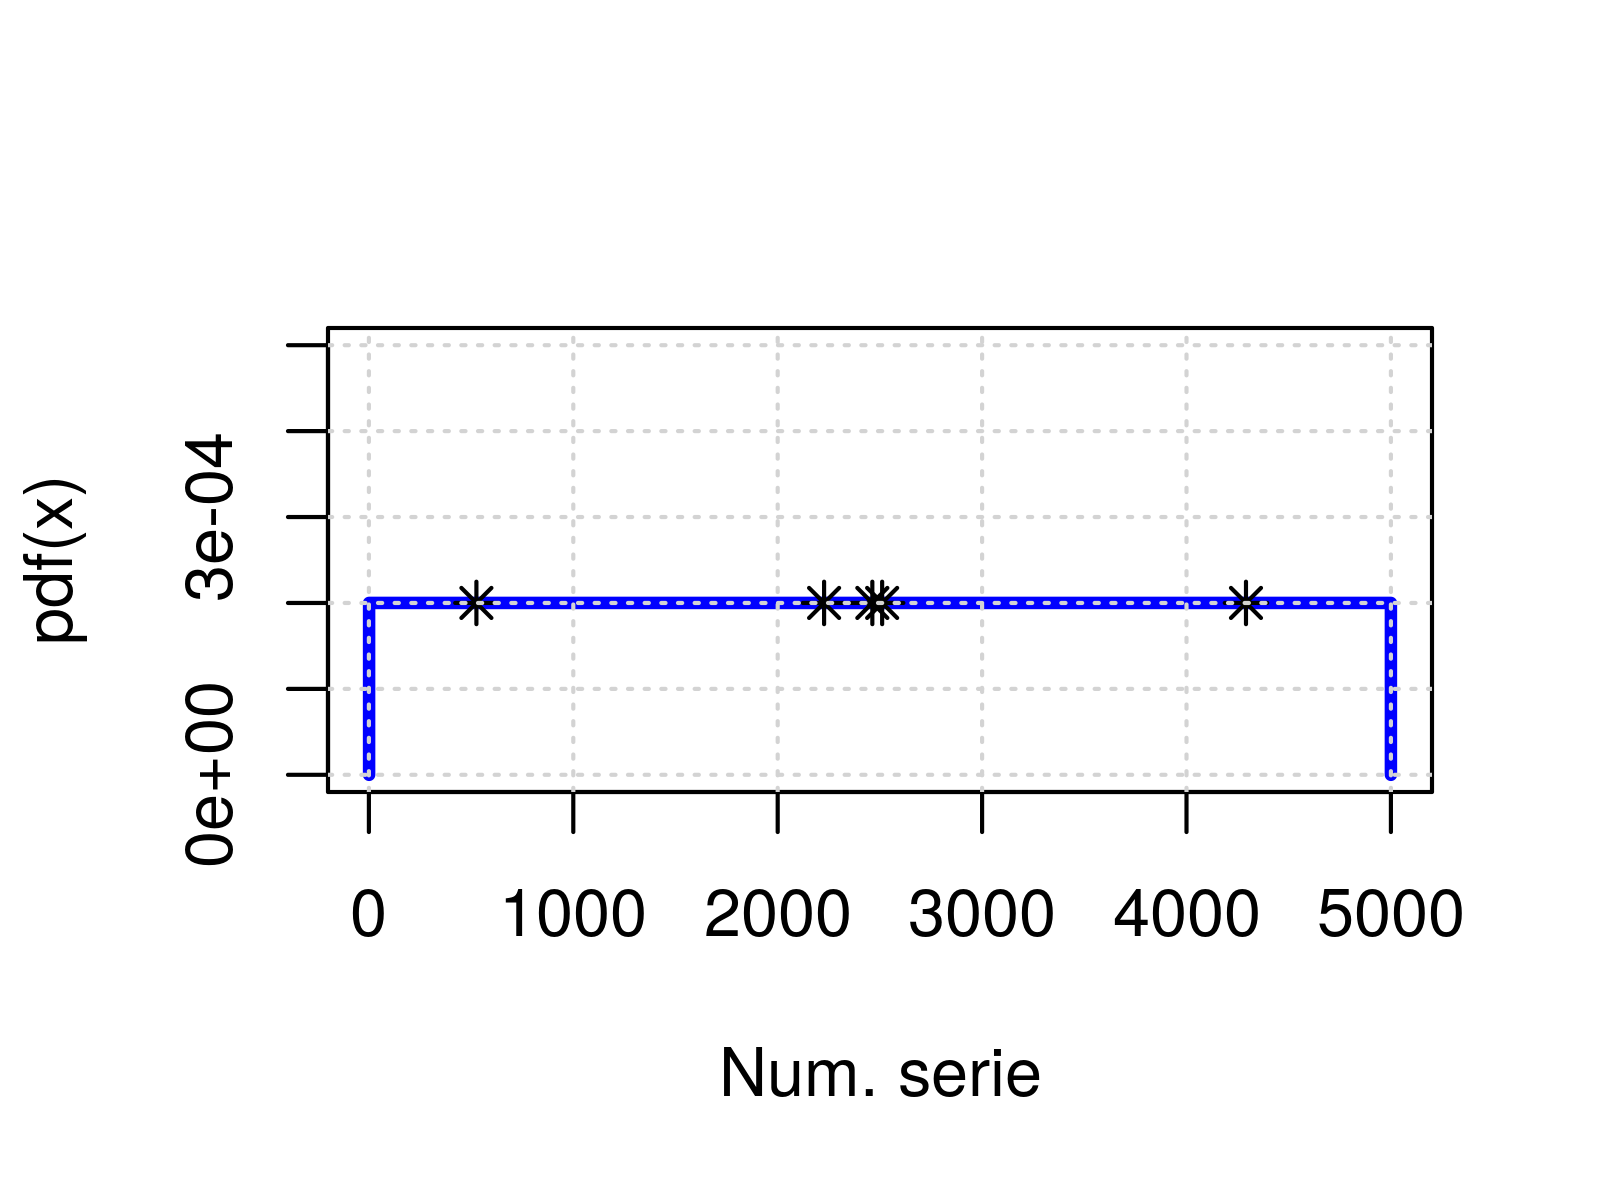

In [23]:
set.seed(123)
totalPopulationSerialNo<-1:5000

# Tamaño del gráfico en Jupyter
options(repr.plot.width=4,repr.plot.height=3)

#Vamos a dibujar la función de densidad de probabilidad 
a<-min(totalPopulationSerialNo)
b<-max(totalPopulationSerialNo)
pdf<-1/(b-a)

plot(c(a,a,b,b), c(0,pdf,pdf,0),t="l",xlim = c(0,b+1),ylim = c(0,0.0005),lwd=3,col="blue",ylab="pdf(x)",xlab="Num. serie")


# Capturamos 5 tanques
capturedSerialNo<-sample(totalPopulationSerialNo,size = 5)

points(capturedSerialNo,rep(pdf,length.out=length(capturedSerialNo)),col="black",cex=1,pch=8)
grid()

print(paste("Los números de serie de tanques capturados son: ", paste(capturedSerialNo,collapse=",")))

Los números de serie capturados consisten en un **muestreo aleatorio simple** de la población total de tanques.
Nuestro objetivo es, sabiendo que se distribuyen siguiendo una función uniforme, estimar el máximo, que llamaremos b, suponiendo que **a=1** .

### Estimación utilizando la media


En el caso de muestreo aleatoria simple, la **media** de la distribución original **coincide** con la de la muestra. Suponiendo que la media de la *población total* es $\mu$ y que la media de nuestra distribución de *tanques capturados* es $\bar{x}$, entonces.
\begin{equation*}
\mu=\frac{a+b}{2}=\frac{1}{N}\sum_{i=1}^N{x_i}=\bar{x}
\end{equation*}

Desarollando llegamos a la fórmula:

\begin{equation*}
\bar{x}=\frac{a+b}{2}\\
2\cdot\bar{x}=a+b\\
b=2\cdot\bar{x}-a \\
\end{equation*}


In [24]:
a <- 1
b <- 2*mean(capturedSerialNo)-a

print(paste("Utilizando como estimador la media, el número máximo de tanques fabricados es",round(b)))

[1] "Utilizando como estimador la media, el número máximo de tanques fabricados es 4806"


### Estimación utilizando la varianza

Utilizando el mismo razonamiento que antes, podemos utilizar la varianza para calcular el máximo número de tanques. Sabemos que la varianza de la *población total* de tanques $\sigma^2$ tiene que coincidir con la varianza de los *números de serie capturados* $Var[x]$.
\begin{equation*}
\sigma^2=\frac{(b-a)^2}{12} \\
Var[x]=\frac{1}{N-1}\sum_{i=1}^N{(x_i-\bar{x})^2}
\end{equation*}
Desarrollando llegamos a la fórmula:
\begin{equation*}
Var[x]=\frac{(b-a)^2}{12} \\
12\cdot Var[x]=(b-a)^2\\
b=a+\sqrt{12\cdot Var[x]}
\end{equation*}




In [25]:
a <- 1
b <- a + sqrt(12*var(capturedSerialNo))
print(paste("Utilizando como estimador la varianza, el número máximo de tanques fabricados es",round(b)))

[1] "Utilizando como estimador la varianza, el número máximo de tanques fabricados es 4627"


### ¿Cual es el mejor estimador?

El mejor estimador será aquel que tenga una probabilidad mayor de dar un valor cercano al correcto.

Repetimos el proceso varias veces, suponiendo que tenemos diferentes intententos o diferentes tipos de tanques que probar.


No id variables; using all as measure variables



[1] "Estimador usando la media:    media: 5000  varianza: 1672178  margen: [2860,7136]"
[1] "Estimador usando la varianza: media: 4814  varianza: 1817041  margen: [2444,6861]"


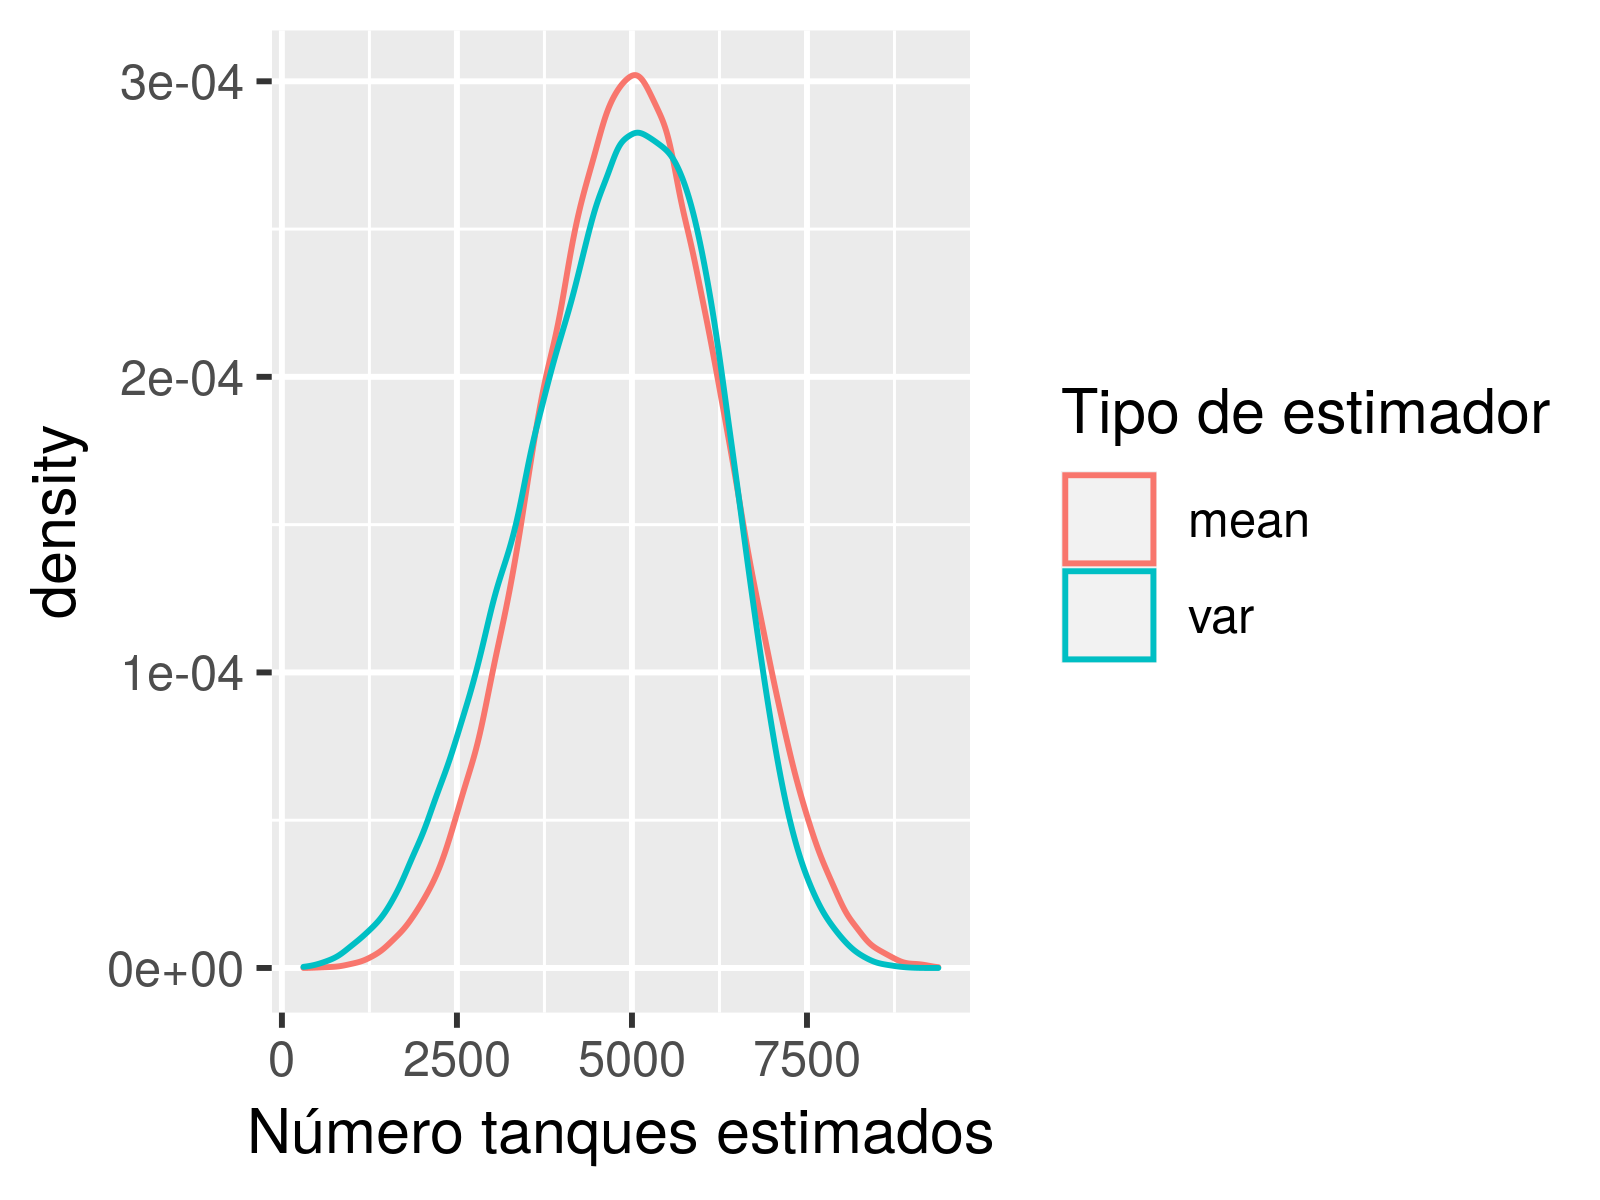

In [26]:
numTries<-1e5
numCapturedTanks<-5

meanEstimated<-rep(NA,numTries)
varEstimated<-rep(NA,numTries)
for (i in 1:numTries){
    capturedSerialNo<-sample(totalPopulationSerialNo,size = numCapturedTanks)
    meanEstimated[i]<-2*mean(capturedSerialNo)-1
    varEstimated[i]<-sqrt(12*var(capturedSerialNo))+1
}
df<-data.frame(mean=meanEstimated,var=varEstimated)
margin_mean<-round(quantile(df$mean,c(0.05,0.95)))
margin_var<-round(quantile(df$var,c(0.05,0.95)))

library(ggplot2)
library(reshape2)


ggplot(data=melt(df),aes(x=value,color=variable))+geom_density()+
 scale_color_discrete("Tipo de estimador")+xlab("Número tanques estimados")
print(paste0("Estimador usando la media:    media: ",round(mean(df$mean)),"  varianza: ",round(var(df$mean)),
      "  margen: [",margin_mean[1],",",margin_mean[2],"]"))
print(paste0("Estimador usando la varianza: media: ",round(mean(df$var)),"  varianza: ",round(var(df$var)),
      "  margen: [",margin_var[1],",",margin_var[2],"]"))

### Estimador insesgado de varianza mínima

Un **estimador insesgado de varianza mínima** es aquel que tiene menor varianza que cualquier otro estimador insesgado para todos los posibles valores del parámetro. Un estimador insesgado es un estimador que no tiene sesgo, con sesgo 0. Para el caso de una distribución uniforme es:
\begin{equation*}
b=\left(1+N^{-1}\right)·x_N-1=x_N+\frac{x_N}{N}-1
\end{equation*}
Donde:
* $x_N$ es el número de serie más grande capturado.
* $N$ es el número total de tanques capturados.
* $a=1$

Esta fórmula sale de suponer que:
\begin{equation*}
x_1-1  \approx  b-x_N
\end{equation*}
Lo que se puede extender a:
\begin{equation*}
x_1-1 \approx x_2-x_1-1 \approx x_3-x_2-1 \approx x_{N}-x_{N-1}-1 \approx  b-x_N\\
\frac{(x_1-1) + (x_2-x_1-1) + (x_3-x_2-1) + \cdots + (x_{N}-x_{N-1}-1)}{N} \approx  b-x_N \\
\frac{x_{N}}{N}-1 \approx  b-x_N \\
b \approx x_N +\frac{x_N}{N}-1
\end{equation*}

No id variables; using all as measure variables



[1] "Estimador usando la media:    media: 5000  varianza: 1672178  margen: [2860,7136]"
[1] "Estimador usando la varianza: media: 4814  varianza: 1817041  margen: [2444,6861]"
[1] "Estimador usando la mvue:     media: 5004  varianza: 709616   margen: [3309,5939]"


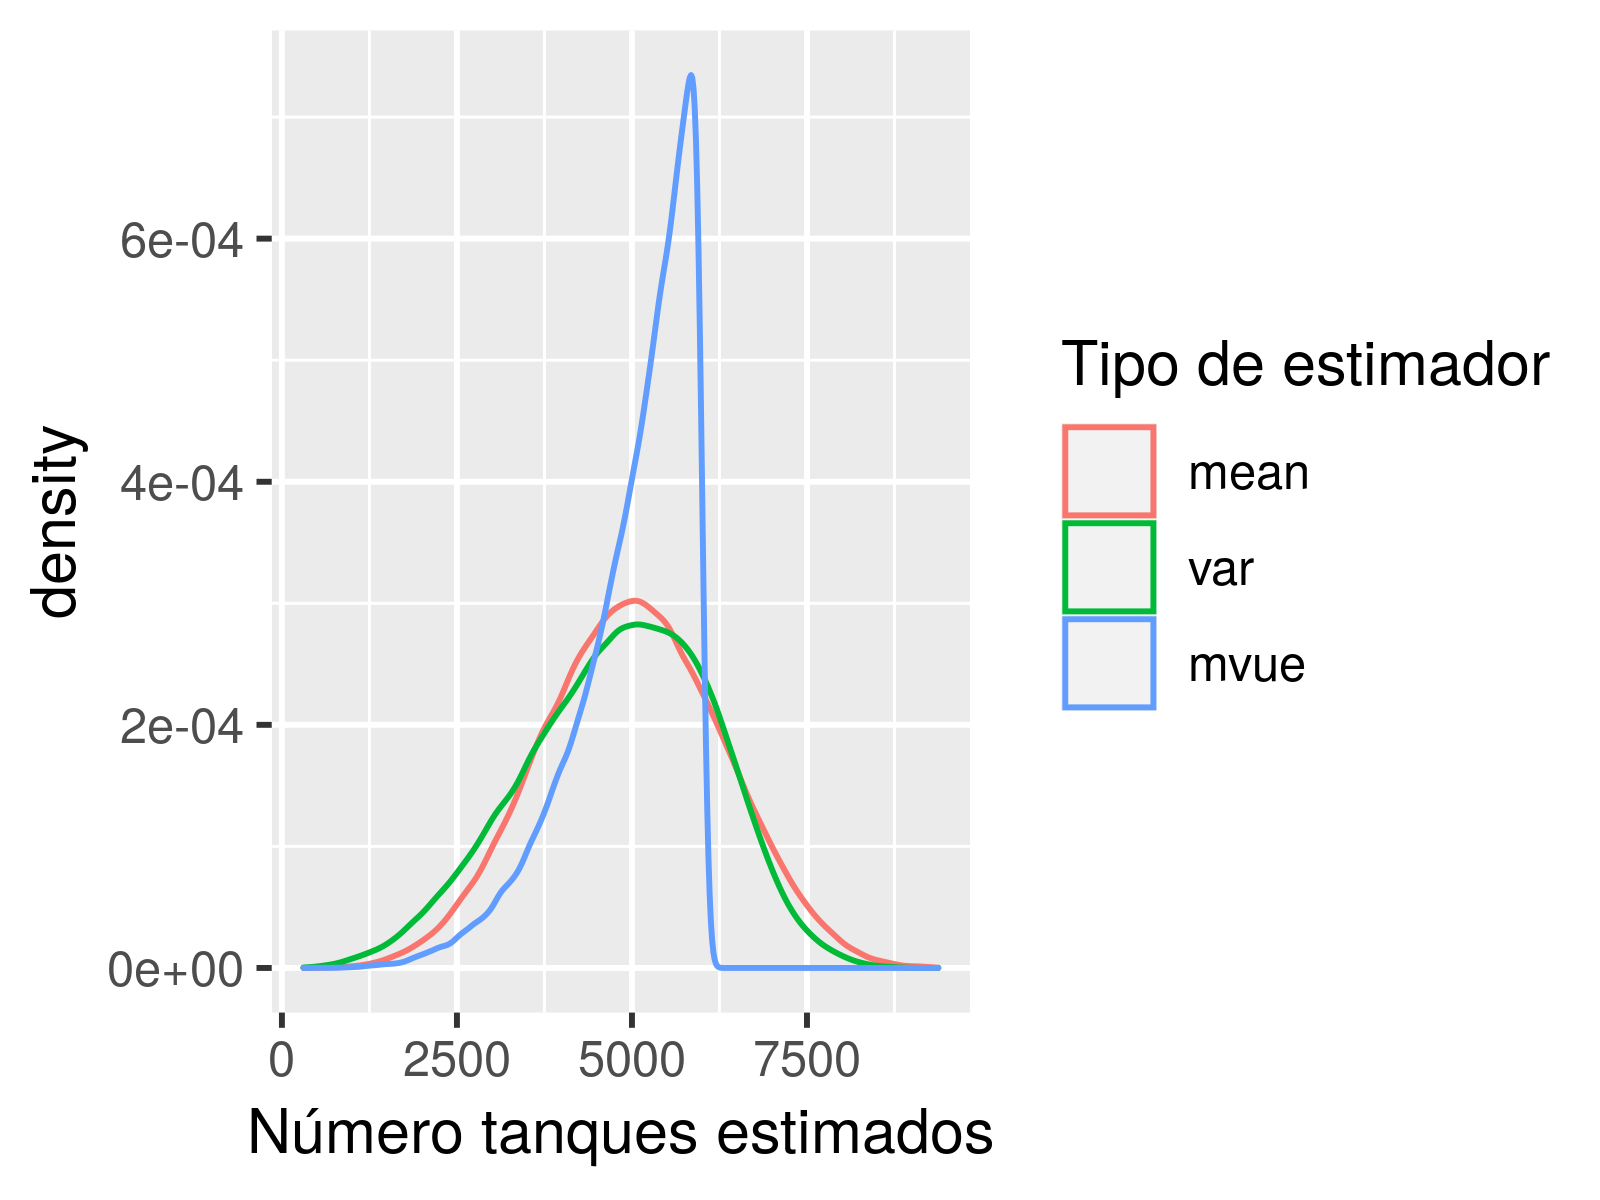

In [27]:
mvue<-rep(NA,numTries)
for (i in 1:numTries){
    capturedSerialNo<-sample(totalPopulationSerialNo,size = numCapturedTanks)
    mvue[i]<-max(capturedSerialNo)*(1+1/length(capturedSerialNo))-1
}
df<-data.frame(mean=meanEstimated,var=varEstimated,mvue=mvue)

ggplot(data=melt(df),aes(x=value,color=variable))+geom_density()+
 scale_color_discrete("Tipo de estimador")+xlab("Número tanques estimados")

margin_mean<-round(quantile(df$mean,c(0.05,0.95)))
margin_var<-round(quantile(df$var,c(0.05,0.95)))
margin_mvue<-round(quantile(df$mvue,c(0.05,0.95)))

print(paste0("Estimador usando la media:    media: ",round(mean(df$mean)),"  varianza: ",round(var(df$mean)),
      "  margen: [",margin_mean[1],",",margin_mean[2],"]"))
print(paste0("Estimador usando la varianza: media: ",round(mean(df$var)),"  varianza: ",round(var(df$var)),
      "  margen: [",margin_var[1],",",margin_var[2],"]"))
print(paste0("Estimador usando la mvue:     media: ",round(mean(df$mvue)),"  varianza: ",round(var(df$mvue)),
      "   margen: [",margin_mvue[1],",",margin_mvue[2],"]"))

### ¿Como varía el margen con el número de tanques capturados?

Por ahora se han realizado experimentos con un número fijo de tanques recuperados. 

En esta sección veremos cómo varía el margen de error dado por cada estimador en función del número de tanques capturados.

Así por ejemplo podemos saber cuantos tanques necesitamos capturar como mínimo para alcanzar el margen de error necesario.


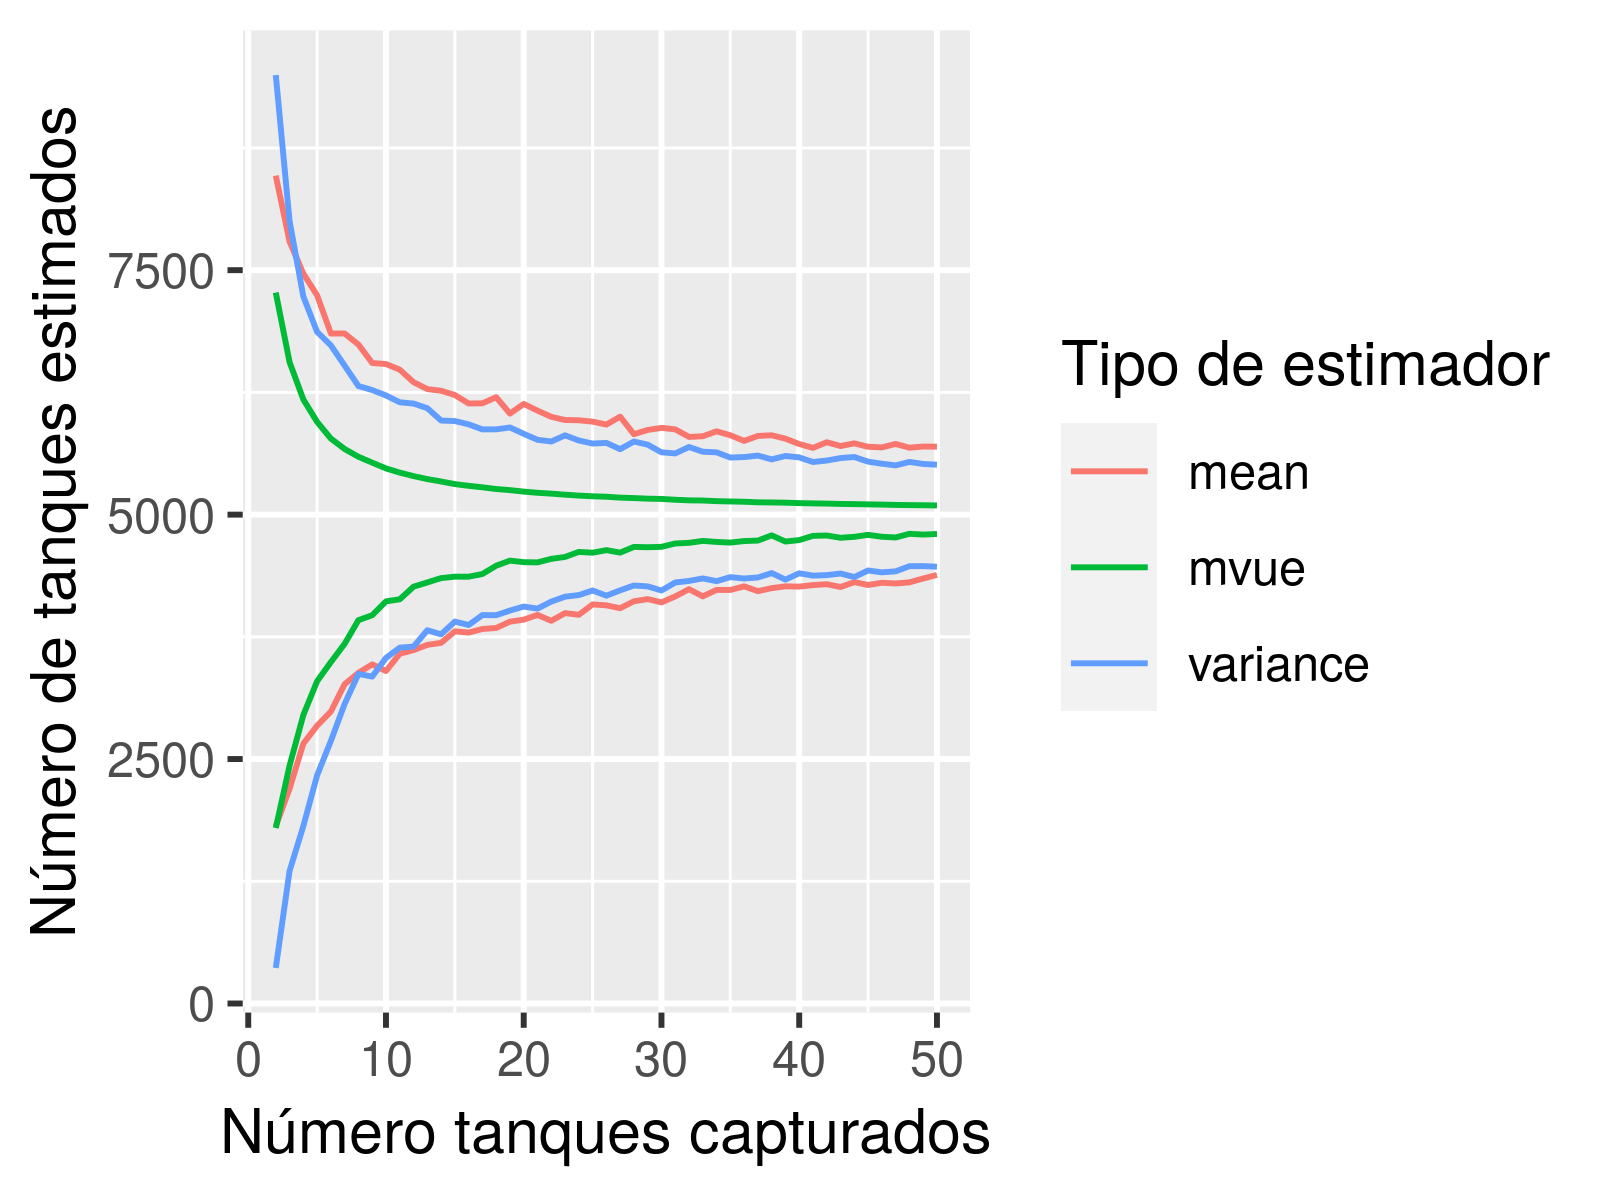

In [28]:
numTries<-1e3
numTanksCaptured<-2:50

margin_mean<-matrix(rep(NA,2*length(numTanksCaptured)),ncol=2)
margin_var<-matrix(rep(NA,2*length(numTanksCaptured)),ncol=2)
margin_mvue<-matrix(rep(NA,2*length(numTanksCaptured)),ncol=2)

for (j in 1:length(numTanksCaptured)){
    
    meanEstimated<-rep(NA,numTries)
    varEstimated<-rep(NA,numTries)
    mvue<-rep(NA,numTries)
    for (i in 1:numTries){
        capturedSerialNo<-sample(totalPopulationSerialNo,size = numTanksCaptured[j])
        meanEstimated[i]<-2*mean(capturedSerialNo)-1
        varEstimated[i]<-sqrt(12*var(capturedSerialNo))+1
        mvue[i]<-max(capturedSerialNo)*(1+1/length(capturedSerialNo))-1
    }

    margin_mean[j,]<-quantile(meanEstimated,c(0.05,0.95))
    margin_var[j,]<-quantile(varEstimated,c(0.05,0.95))
    margin_mvue[j,]<-quantile(mvue,c(0.05,0.95))
}

df_mean<-melt(data.frame(m1=margin_mean[,1],m2=margin_mean[,2],num=numTanksCaptured),id="num")
df_mean$group<-"mean"
df_var<-melt(data.frame(v1=margin_var[,1],v2=margin_var[,2],num=numTanksCaptured),id="num")
df_var$group<-"variance"
df_mvue<-melt(data.frame(n1=margin_mvue[,1],n2=margin_mvue[,2],num=numTanksCaptured),id="num")
df_mvue$group<-"mvue"
df<-rbind(df_mean,df_var,df_mvue)

ggplot(data=df,aes(x=num,y=value,group=variable,color=group))+geom_line()+ 
 scale_color_discrete("Tipo de estimador")+xlab("Número tanques capturados")+ylab('Número de tanques estimados')

# Tipos de muestreo

## Muestreo aleatorio simple 

En este grupo se encuentran los métodos en los cuales se toma una muestra aleatoria de la población total. Consiste en seleccionar al azar diferentes elementos de la población. Puede ser:
* con reemplazo: Si un mismo elemento puede ser seleccionado más de una vez.
* sin reemplazo: Una vez que se selecciona un elemento no se puede puede volver a seleccionar.

Por ejemplo si de un mazo de cartas seleccionamos 5 al azar estaremos realizando muestreo aleatorio simple sin reemplazo.
![](./pics/muestreoaleatorio.jpg)

### Funciones en R

En R existe la función *sample()* que permite hacer muestreo aleatorio con o sin reemplazo.

Veamos un ejemplo con el dataset Iris

In [6]:
sample(1:nrow(iris),3)

[1] 140  83  29

In [7]:
N <- 5
indices <- sort(sample(1:nrow(iris),N, replace=F))
paste("Los indices de los elementos seleccionados son:", paste(indices,collapse=",") )
iris[indices,]

[1] "Los indices de los elementos seleccionados son: 46,77,82,93,145"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
46,4.8,3.0,1.4,0.3,setosa
77,6.8,2.8,4.8,1.4,versicolor
82,5.5,2.4,3.7,1.0,versicolor
93,5.8,2.6,4.0,1.2,versicolor
145,6.7,3.3,5.7,2.5,virginica


## Muestreo sistemático

Se comienza colcando toda la población en el orden deseado, se selecciona el primer elemento y a continuación se va seleccionado el k-ésimo elemento siguiente al previamente seleccionado. *k* se conoce como intervalo de muestreo se puede calcular como:
\\[
k=\frac{\text{Tamaño población total}}{\text{Tamaño de muestra}}
\\]

En el siguiente ejemplo con cartas se han seleccionado las cartas eligiendo un $k=3$:

![](./pics/muestreosistematico.jpg)

### Funciones en R

En R podemos usar la función *seq(from,to, by=k)* para realizar el muestreo sistemático.

Veamos un ejemplo con el dataset Iris

In [8]:
k<-30
indices <- seq(1,nrow(iris), by=k)
paste("Los indices de los elementos seleccionados son:", paste(indices,collapse=",") )
iris[indices,]

[1] "Los indices de los elementos seleccionados son: 1,31,61,91,121"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
31,4.8,3.1,1.6,0.2,setosa
61,5.0,2.0,3.5,1.0,versicolor
91,5.5,2.6,4.4,1.2,versicolor
121,6.9,3.2,5.7,2.3,virginica


## Muestreo estratificado

Consiste en dividir los datos en grupos. Luego sobre cada grupo se selecciona el número de elementos deseado.

![](./pics/muestreoestratificado.jpg)

### Funciones en R

En R podemos usar la función *subset* para elegir cada uno de los subgrupos y luego *sample* para elegir elementos dentro de cada grupo.

Veamos un ejemplo con el dataset Iris

In [9]:
groups<-unique(iris$Species)
paste("Hay",length(groups),"grupos")

muestraIris <- iris[0,]
for (group in groups){
    subgrupoIris<- subset(iris,Species==group)
    idx<- sample(1:nrow(subgrupoIris),2)
    muestraIris <-rbind(muestraIris,subgrupoIris[idx,])
}
muestraIris

[1] "Hay 3 grupos"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
29,5.2,3.4,1.4,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa
85,5.4,3.0,4.5,1.5,versicolor
100,5.7,2.8,4.1,1.3,versicolor
132,7.9,3.8,6.4,2.0,virginica
123,7.7,2.8,6.7,2.0,virginica


# Margen de error

Hasta ahora hemos hablado sobre como seleccionar elementos, pero ¿en qué afecta elegir más o menos elementos?

Entendemos como margen de error a la cantidad de desconocimiento que tenemos del test estadístico que calculamos. Cuantos más elementos cojamos menor será el margen de error.
De la mano del margen de error viene el **intervalo de confianza**, que indica el grado de confianza que tenemos a la hora de dar un test estadístico.

Por ejemplo podemos decir que la media de altura de un grupo de personas es de $1.70m$ con un error del $\pm 10$ para el 95% de las muestras, o que su intervalo de confianza en el 95% de los casos es $[1.60,1.80]$.


Indicar el margen de error puede ser vital en los modelos. Por ejemplo en 2016 se publicó por parte de ARC un artículo donde se sugería que un motor propulsado únicamente con microondas podría funcionar violando la tercera ley de Newton: [EM-drive](https://arc.aiaa.org/doi/10.2514/1.B36120)

Pero la gráfica que publicaron muestra un error tan grande que es dificil de asegurar:
![](https://arc.aiaa.org/cms/10.2514/1.B36120/asset/images/medium/figure19.gif)

## Distribución gaussiana

Supongamos que hay una población la cual sigue una distribución gaussiana. Queremos calcular la media de dicha distribución, pero no podemos acceder al total de la población sino a una muestra de la misma. Tendremos dos casos:
* Varianza conocida: Alguien nos ha dicho cual es la varianza real que tiene la población total.
* Varianza desconocida: Tendremos que estimar la varianza de la población total en base a la varianza de nuestra meustra.

### Varianza conocida

De la muestra podemos calcular la media $\bar{x}$, la varianza es conocida e igual a $\sigma^2$.

Podemos comprobar que el **error estandar de la media** es $\sigma_M^2=\frac{\sigma^2}{n}$ donde $n$ es el número de elementos en nuestra muestra.

#### Ejemplo R

Tenemos 20 muestras que sabemos que vienen de una distribución gausiana de desviación típica 4. ¿Cual será la distribución de la medias correspondientes a los vectores de muestreo?

In [10]:
n=5
s=4

In [26]:
mu=7
X <- rnorm(n, mean=mu,sd=s)
X
mean(X)

[1]  8.8809936  7.9982563 10.5237358  4.4702091 -0.7322974

[1] 6.228179

In [11]:
set.seed(12345)
sampled_means<-c()

for (i in 1:1000){
    X <- rnorm(n, mean=mu,sd=s)
    m <- mean(X)
    sampled_means<-c(sampled_means,m)
}

paste0("La media real es: ",mu,". La media estimada es ",mean(sampled_means))
paste0("La varianza real de las medias es: ",s^2/n,". La varianza estimada es ",var(sampled_means))

[1] "La media real es: 7. La media estimada es 7.00087650175443"

[1] "La varianza real de las medias es: 3.2. La varianza estimada es 3.05394565516079"

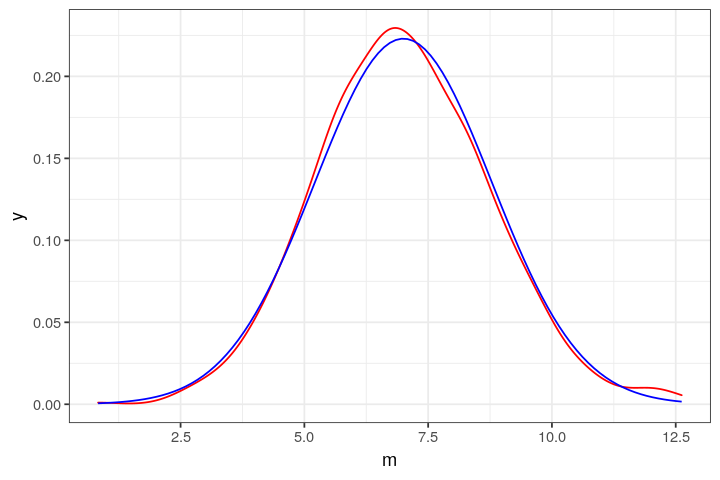

In [54]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
ggplot(data=data.frame(m=sampled_means),aes(x=m))+
    #geom_histogram(fill='red',color='black',alpha=0.5)+
    geom_density(color="red")+
    stat_function(fun=dnorm,args = list(mean = mu, sd=s/sqrt(n)),color="blue")+
    theme_bw()

A veces en lugar de mostrar la función Gaussiana se muestra su valor normalizado, el z-score:
\\[
z=\frac{x-\mu}{\sigma_M}=\frac{x-\mu}{\sigma/ \sqrt{n}}
\\]

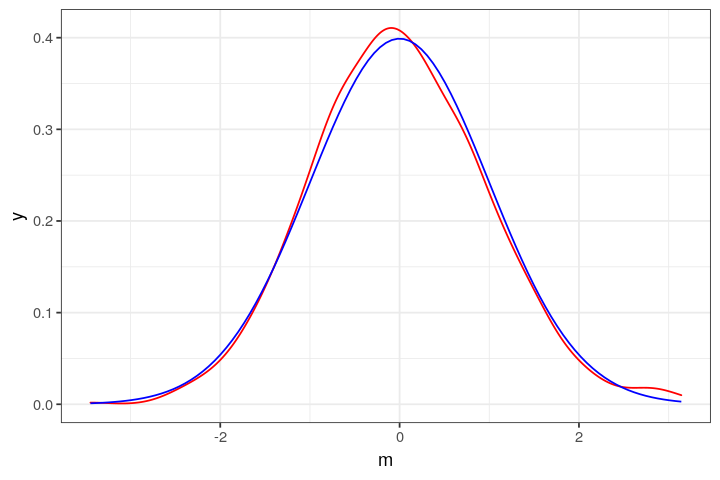

In [55]:
z<- (sampled_means-mean(sampled_means))/(s/sqrt(n))
ggplot(data=data.frame(m=z),aes(x=m))+
    geom_density(color="red")+
    stat_function(fun=dnorm,args = list(mean = 0, sd=1),color="blue")+
    theme_bw()

Sabiendo que el vector de las medias tiene una distribución gaussiana de media $\bar{x}$ y desviación típica $\frac{\sigma}{\sqrt{n}}$ es fácil calcular el margen de error con una probabilidad de $p$.

El intervalo de confianza para la media viene dado por la siguiente fórmula:
\\[
\begin{split}
\text{Limite inferior} = \bar{x}-Q(p/2)·\sigma_M=\bar{x}-Q(p/2)·\frac{\sigma}{\sqrt{n}} \\
\text{Limite superior} = \bar{x}+Q(p/2)·\sigma_M=\bar{x}+Q(p/2)·\frac{\sigma}{\sqrt{n}} \\
\end{split}
\\]
Donde $p$, a veces llamado p-valor, es la probabilidad de que la media se encuentre fuera de ese rango.
También podemos decir que se encuentra dentro del rango con una confianza de $1-p$.

In [88]:
#La función q para p=0.025 (2.5%) es:
qnorm(0.025,lower.tail = F)

[1] 1.959964

[1] "El margen que nos interesa está en el rango: [ -1.96 , 1.96 ]"

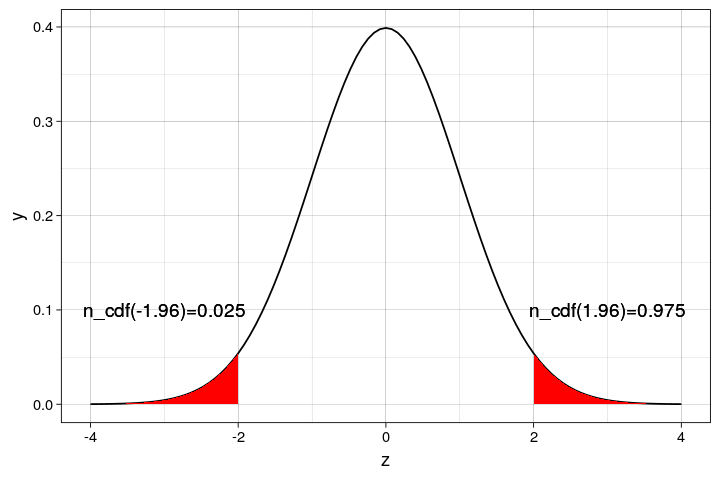

In [89]:
library(ggplot2)

loth<-qnorm(0.025,lower.tail = T)
upth<-qnorm(0.025,lower.tail = F)

paste("El margen que nos interesa está en el rango: [",
      round(loth,2),",",round(upth,2),"]")


qsd009<-function(x){    
    out<-dnorm(x)
    out[x> loth  & x<upth  ]<-NA
    out
}
options(repr.plot.height=4,repr.plot.width=6)
xdf<-data.frame(z=c(-4,4))
ggplot(xdf,aes(x=z))+stat_function(fun=dnorm)+
  stat_function(fun=qsd009, geom="area",fill="red")+
  geom_text(x=3,y=0.1,size=4,label=paste0("n_cdf(",round(upth,2),")=0.975"))+
  geom_text(x=-3,y=0.1,size=4,label=paste0("n_cdf(",round(loth,2),")=0.025"))+
  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)

#### Ejemplo R

Tenemos 20 muestras que sabemos que vienen de una distribución gausiana de desviación típica 3, pero su media es desconocida, tenemos que estimarla, ¿cual será su intervalo de confianza para un p-valor de 0.05?

In [80]:
set.seed(12345)
n=20
s=3
X<-rnorm(n,mean=7,sd=s)
X

[1]  8.756586  9.128398  6.672090  5.639508  8.817662  1.546132  8.890296
 [8]  6.171448  6.147521  4.242034  6.651257 12.451936  8.111884  8.560649
[15]  4.748404  9.450700  4.340927  6.005267 10.362138  7.896171

In [81]:
m <- mean(X)
print(m)

[1] 7.22955


In [82]:
sm <- s/sqrt(n)
error <- qnorm(0.025, lower.tail=F)*sm

upl <- m + error
lowl <- m - error
error

[1] 1.314784

In [83]:
print(paste0("La media es ",m," con un error de ±",error))
print(paste0("El intervalo de confianza con un p-valor=0.05 es:[",lowl,",",upl,"]"))

[1] "La media es 7.22955042680595 con un error de ±1.31478381086487"
[1] "El intervalo de confianza con un p-valor=0.05 es:[5.91476661594108,8.54433423767083]"


In [84]:
error2 <- qnorm(0.1, lower.tail=F)*sm
upl2 <- m + error2
lowl2 <- m - error2
error2

[1] 0.8596909

In [85]:
print(paste0("El intervalo de confianza con un p-valor=0.2 es:[",lowl2,",",upl2,"]"))

[1] "El intervalo de confianza con un p-valor=0.2 es:[6.36985950163725,8.08924135197466]"


Podemos demostrar estos resultados haciendo una simulación en R, imaginando que repetimos este experimento miles de veces y calculamos la distribución del a media.

In [73]:
NumTrials<-50000
n<-20
s<-3
meanArray<-c()
for (i in 1:NumTrials){
    X <- rnorm(n,mean=7,sd=s)
    m <- mean(X)
    meanArray <- c(meanArray,mean(X))
}
print(paste("La media del estimador es:",mean(meanArray)))
print(paste("La varianza del estimador es:",var(meanArray)))
print(paste("La varianza predicha del estimador es:", s^2/n ))

[1] "La media del estimador es: 7.00086693686664"
[1] "La varianza del estimador es: 0.447951034333951"
[1] "La varianza predicha del estimador es: 0.45"


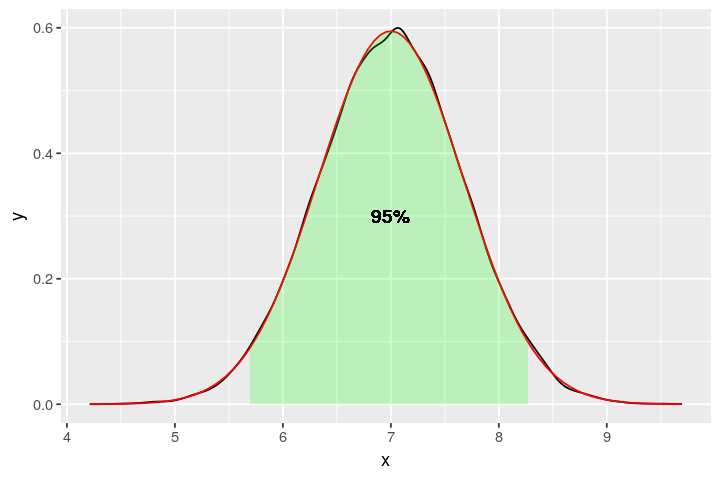

In [74]:
require(ggplot2)
df<-data.frame(x=meanArray)

sm<-s/sqrt(n)

fillarea<-function(x){
    
    error <- qnorm(0.025,lower.tail = F)*sm
    
    out<-dnorm(x,mean = 7, sd=sm)
    out[x<(7-error)]<-NA
    out[x>(7+error)]<-NA
    out
}

options(repr.plot.height=4,repr.plot.width=6)
ggplot(df,aes(x))+geom_density()+    
    stat_function(fun=dnorm,args = list(mean = 7, sd=sm),col="red")+
    stat_function(fun=fillarea, geom="area",fill="green",alpha=0.2)+
    geom_text(x=7,y=0.3,size=4,label="95%")
    

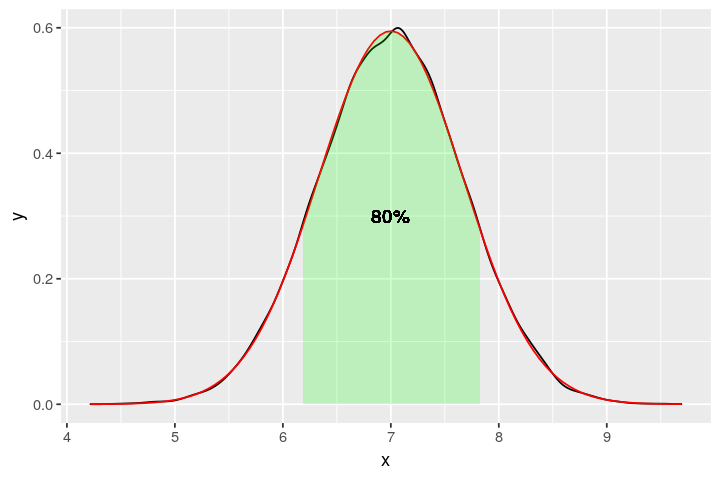

In [75]:
df<-data.frame(x=meanArray)

sm<-s/sqrt(n)

fillarea<-function(x){
    
    error <- qnorm(0.1,lower.tail = F)*sm
    
    out<-dnorm(x,mean = 7, sd=sm)
    out[x<(7-error)]<-NA
    out[x>(7+error)]<-NA
    out
}

options(repr.plot.height=4,repr.plot.width=6)
ggplot(df,aes(x))+geom_density()+    
    stat_function(fun=dnorm,args = list(mean = 7, sd=sm),col="red")+
    stat_function(fun=fillarea, geom="area",fill="green",alpha=0.2)+
    geom_text(x=7,y=0.3,size=4,label="80%")

#### ¿Qué significa un margen de error con un pvalor de 0.2?

Significa que el 80% de las veces el valor real estará fuera de ese intervalo.


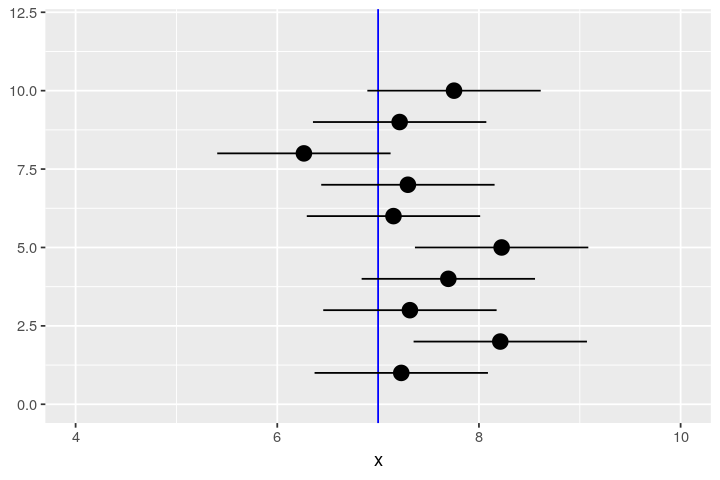

In [86]:
set.seed(12345)
NumTrials<-10
n<-20
s<-3
meanArray<-c()
g<-ggplot(data=data.frame(x=1))+geom_vline(xintercept = 7,color="blue")+xlim(c(4,10))+ylim(c(0,12))+xlab("x")
for (i in 1:NumTrials){
    X<-rnorm(n,mean=7,sd=s)
    #print(paste0("[",mean(X)-error2,",",mean(X)+error2,"]"))
    g<-g+geom_segment(x=mean(X)-error2,y=i,xend=mean(X)+error2,yend=i)+geom_point(x=mean(X),y=i,size=4)
}
g


### Varianza desconocida

Evidentemente muy pocas veces vamos a saber cual es la varianza de la población original, la mayoría de las veces tendremos que estimarla. 
La desviación típica de la media se calcula esta vez sobre la varianza estimada:
\\[
\sigma_M^2 = \frac{Var[x]}{n}
\\]

Así pues en la incertidumbre de la media hay que añadir la incertidumbre del cálculo de la varianza. Por este motivo para calcular los límites no podemos utilizar la función Q(x) de una gaussiana sino que tendrémos que utilizar la distribución t-student.


#### Ejemplo R

Tenemos 5 muestras que sabemos que vienen de una distribución gausiana de varianza desconocida. ¿Cual será la distribución de la medias correspondientes a los vectores de muestreo?

In [28]:
n=5
s=3
mu=7

In [106]:
X <- rnorm(n, mean=mu,sd=s)
X
mean(X)
var(X)

[1]  7.351345  9.805493 11.170071  6.633040  8.854888  6.071741  2.195728
 [8]  3.514196 10.216947  5.901261  8.746909 13.255507  4.687958  4.758110
[15]  9.113900  6.826877 11.367753  3.653321 10.994827  6.664261

[1] 7.589207

[1] 9.108805

In [92]:
set.seed(12345)

sampled_means<-c()
sampled_vars<-c()

for (i in 1:1000){
    X <- rnorm(n, mean=mu,sd=s)
    m <- mean(X)
    v <- var(X)
    sampled_means <- c(sampled_means,m)
    sampled_vars <- c(sampled_vars,v)
}

paste0("La media real es: ",mu,". La media estimada es ",mean(sampled_means))
paste0("La varianza real de las medias es: ",s^2/n,". La varianza estimada es ",var(sampled_means))

[1] "La media real es: 7. La media estimada es 6.99550595854908"

[1] "La varianza real de las medias es: 0.45. La varianza estimada es 0.435049441465868"

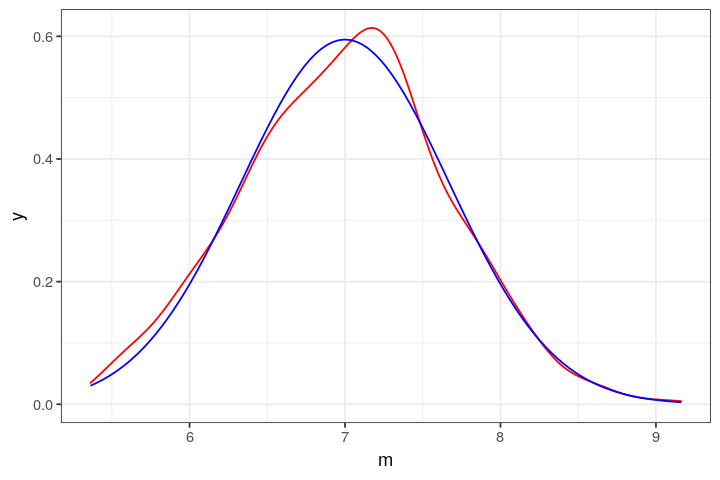

In [97]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
ggplot(data=data.frame(m=sampled_means),aes(x=m))+
    geom_density(color="red")+
    stat_function(fun=dnorm,args = list(mean = mu, sd=s/sqrt(n)),color="blue")+
    theme_bw()

A veces en lugar de mostrar la función Gaussiana se muestra su valor normalizado, el z-score:
\\[
z=\frac{x-\mu}{\sigma_M}=\frac{x-\mu}{\sqrt{var[x]/ n}}
\\]

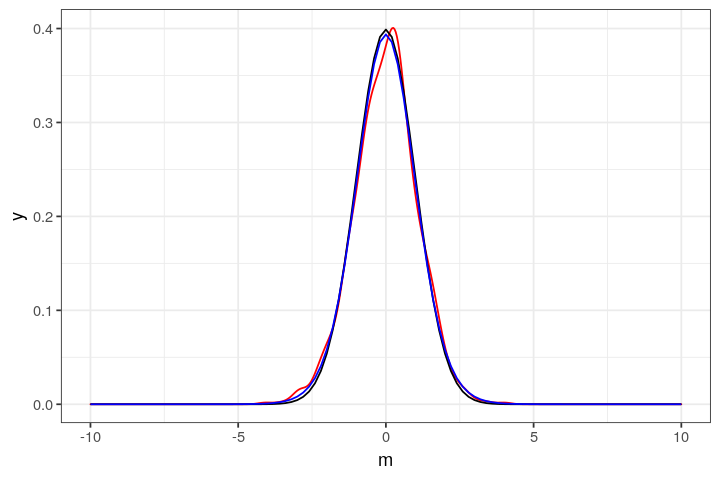

In [108]:
mean_x <- mean(sampled_means)

z<- (sampled_means-mean_x)/(sqrt(sampled_vars/n))
ggplot(data=data.frame(m=z),aes(x=m))+
    geom_density(color="red")+
    stat_function(fun=dnorm,args = list(mean = 0, sd=1),color="black")+
    stat_function(fun=dt,args = list(df = n-1),color="blue")+
    xlim(c(-10,10))+
    theme_bw()

Los intervalos de confianza para un p-valor de $p$ y $n$ muestras vendrá dado por la fórmula:

\\[
\begin{split}
\text{Limite inferior} = \bar{x}-Q(p/2)·\sigma_M=\bar{x}-t(1-p/2,n-1)·\frac{\sqrt {var[X]}}{\sqrt{n}} \\
\text{Limite superior} = \bar{x}+Q(p/2)·\sigma_M=\bar{x}+t(1-p/2,n-1)·\frac{\sqrt {var[X]}}{\sqrt{n}} \\
\end{split}
\\]

Donde t(p,n-1) es la función cumulativa de probabilidad de una distribución t-student con $n-1$ grados de libertad.

#### Ejemplo R

Tenemos 20 muestras que sabemos que vienen de una distribución gausiana de varianza y media desconocida. ¿Cual será  el valor de la media con un p-valor de 0.05?

In [109]:
# El valor de X para el cual la integral de la función de probabilidad de t-student 
# desde menos -inf hasta X da 0.975.
qt(0.975,n-1)

[1] 2.093024

In [110]:
set.seed(12345)
n<-20
X<-rnorm(n,mean=7,sd=3)
m <- mean(X)
m

[1] 7.22955

In [111]:
sm <- sd(X)/sqrt(n)

error <- qt(0.975,n-1)*sm
upl <- m + error
lowl <- m- error

print(paste0("La media es ",m," con un error de ±",error))
print(paste0("El intervalo de confianza con un p-valor=0.05 es:[",lowl,",",upl,"]"))

[1] "La media es 7.22955042680595 con un error de ±1.17088139833778"
[1] "El intervalo de confianza con un p-valor=0.05 es:[6.05866902846817,8.40043182514374]"


In [115]:
print("Podemos utilizar la función t.test:")

t.test(x=X,conf.level=0.95)

[1] "Podemos utilizar la función t.test:"



	One Sample t-test

data:  X
t = 12.923, df = 19, p-value = 7.336e-11
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.058669 8.400432
sample estimates:
mean of x 
  7.22955 


## Intervalo de confianza para proporciones

Imaginemos que hemos realizado $n$ experimentos independientes, cada experimento puede acaber con éxito con una probabilidad $p$.

Si de los $n$ experimentos realizados tenemos $n_s$ experimentos que acaban en éxito, podemos estimar la probabilidad como $\hat{p}=\frac{n_s}{n}$. 

Pero está claro que no se tiene la misma confianza en la proporción si hacemos 2 experimento o 2000, aunque ambos ofrezcan una $\hat{p}=0.5$.
La proporción $\hat{p}=0.5=\frac{1000}{2000}$ parece tener una mayor confianza que $\hat{p}=0.5=\frac{1}{2}$.
A calcular el margen de error de esta probabilidad se le llama credibilidad de una proporción o probabilidades de cobertura.


https://towardsdatascience.com/five-confidence-intervals-for-proportions-that-you-should-know-about-7ff5484c024f

### Aproximación gaussiana asintótica

También conocida como método de Wald, el margen de error es símetrico y viene dado por la fórmula:
\\[
\Delta \hat{p} = Q(\alpha/2)\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\\]
El problema es que esta fómula puede llevar a dos aberraciones:
* Para bajas proporciones, cuando $n_s$ es bajo, el límite inferior puede ser negativo ($\Delta \hat{p}>\hat{p}$). Para $\hat{p}$ cercano a 1, el límite superior puede excedeer 1.
* Intervalo $\Delta \hat{p}=0$ ocurre cuando p=0 o p=1. Aunque el uso del factor corrector de continuidad puede solucionarlo:
\\[
\Delta \hat{p} = Q(\alpha/2)\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}+\frac{1}{2n}
\\]


In [117]:
data_sample<-runif(1000, min = 0, max = 1) > 0.7
n<-length(data_sample)
ns<-sum(data_sample)
p_<-ns/n
print(paste("Probabilidad:",p_," Éxitos:",ns," Eventos totales:",n))


[1] "Probabilidad: 0.323  Éxitos: 323  Eventos totales: 1000"


In [118]:
pval <- 0.05
E<-qnorm(pval/2,lower.tail = F)*sqrt(p_*(1-p_)/n)+1/(2*n)
paste("El intervalo de confianza del 95%: [",p_-E,",",p_+E,"]")

[1] "El intervalo de confianza del 95%: [ 0.293516976662536 , 0.352483023337464 ]"

In [119]:
prop.test(ns, n ,conf.level = 1-pval)


	1-sample proportions test with continuity correction

data:  ns out of n, null probability 0.5
X-squared = 124.61, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2942555 0.3531225
sample estimates:
    p 
0.323 


### Intervalo de confianza de proporcion binomal

Recoremos lo que era una función binomal:

> La distribución binomial es una generalización de la distribución de Bernoulli para nn sucesos independientes, cada uno de los cuales tiene dos posibles resultados Si/No con probabilidad pp.

> Ejemplo: Tiramos al aire 20 monedas y mirarmos cual es la probabilidad de que 10 salgan cara.

> Variables que definen la distribución:

>   * p - probabilidad de éxito de un caso individual
>   * n - número de eventos totales que se desean medir
>   * k - número de eventos que ha salido SI.



In [127]:
# Ejemplo: Tiramos 20 monedas NO TRUCADAS al aire y miramos la probabilidad de que 10 salgan cara

dbinom(x=10, size=20, prob=0.5)

[1] 0.1761971

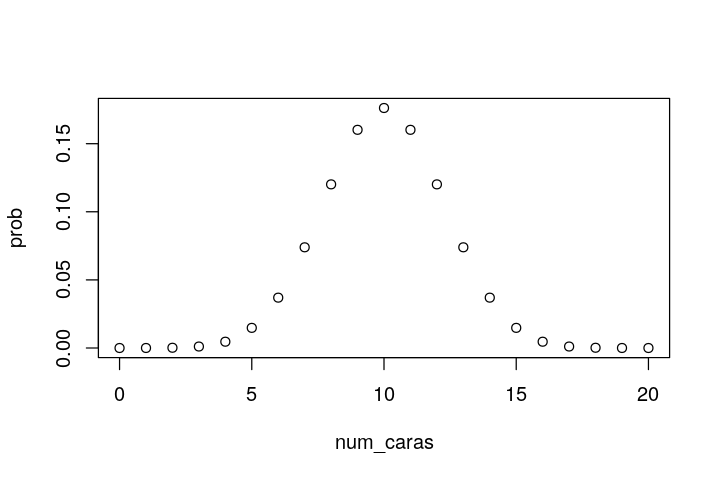

In [128]:
num_caras <- 0:20
prob<-dbinom(num_caras, size=20, prob=0.5)
#prob<-pbinom(num_caras, size=20, prob=0.5)
plot(num_caras,prob)

En este caso el intervalo de confianza no es simétrico y viene dado por la fórmula $(inf S_{\geq }, sup S_{\leq })$:
\\[
\begin{split}
S_{\geq } =  \left\{ \theta  \mid P[Bin(n;\theta) \geq n_s ] > \frac{\alpha}{2} \right\} \\
S_{\leq } =  \left\{ \theta  \mid P[Bin(n;\theta) \leq n_s ] > \frac{\alpha}{2} \right\}
\end{split}
\\]



### Funciones en R

Esto se puede calcular en R ejecutando la función binom.test:

In [129]:
binom.test(ns,n)


	Exact binomial test

data:  ns and n
number of successes = 323, number of trials = 1000, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2940739 0.3529724
sample estimates:
probability of success 
                 0.323 



	Exact binomial test

data:  ns and nt
number of successes = 10, number of trials = 20, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2719578 0.7280422
sample estimates:
probability of success 
                   0.5 


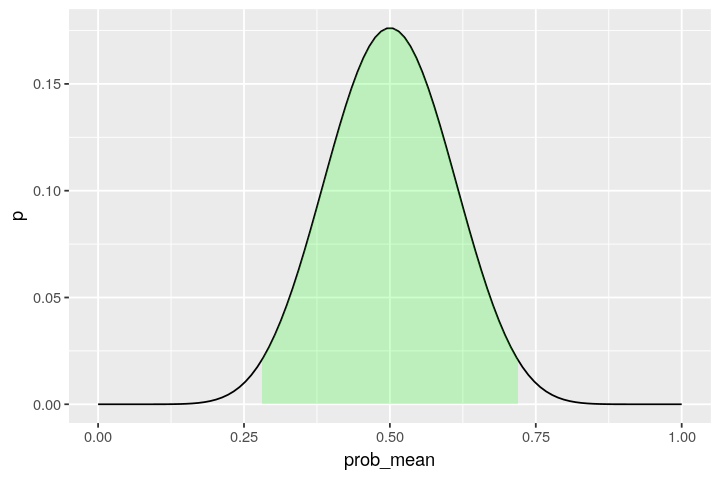

In [130]:
ns<-10
nt<-20
bt<-binom.test(ns,nt)
bt

df_binom_test<-data.frame(prob_mean=seq(0,1,length.out=100))
df_binom_test$p<-dbinom(ns,nt,df_binom_test$prob_mean)

fillarea<-function(x){
            
    out<-dbinom(ns,nt,x)
    out[x<bt$conf.int[1]]<-NA
    out[x>bt$conf.int[2]]<-NA
    out
}

options(repr.plot.height=4,repr.plot.width=6)
library(ggplot2)
ggplot(df_binom_test,aes(x=prob_mean,y=p))+geom_line()+
    stat_function(fun=fillarea, geom="area",fill="green",alpha=0.2)

La probabilidad más alta es 0.5. Si suponemos que la probabilidad del evento es 0.5, es decir el valor ns/nt, y tenemos:
\\[
ns=10 \\
nt=20
\\]
Sabemos que un 17% de las veces que tengamos 20 eventos, habrá exactamente 10 eventos positivos.

In [131]:
dbinom(ns,nt,0.5)

[1] 0.1761971

### Intervalo de confianza usando función Beta


La fórmula de su densidad de probabilidad recuerda mucho a la de Binomial. Recordemos la formula de la función de distribución de Binomial:
\\[
Pr(X=k)=\binom{n}{k}p^k(1-p)^{n-k}
\\]

La función de densidad de probabilidad de la función beta es:
\\[
pdf(p) = \frac{p^{\alpha-1}(1-p)^{\beta-1}}{B(\alpha,\beta)}
\\]
Donde:
\\[
B(\alpha,\beta)=\int_0^1 p^{\alpha-1}(1-p)^{\beta-1} dx
\\]

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu= \frac{\alpha}{\alpha + \beta} \qquad
\sigma^2= \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
\\]
La moda sería:
\\[
moda = \frac{\alpha-1}{\alpha + \beta -2}
\\]

Podemos pensar en
* α-1 como el número de éxitos
* β-1 como el número de fallos

La función beta también nos puede ayudar en estos casos:

Más sobre la distribución Beta:
https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af

Ejemplo práctico con monedas:

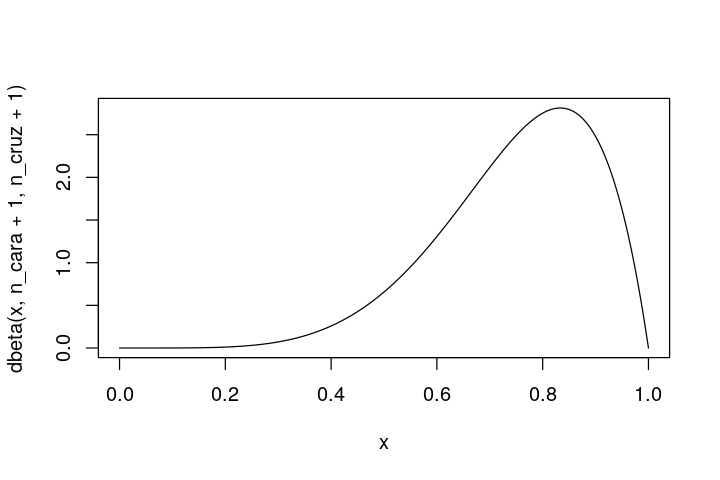

In [141]:
n_cara <-5 #Numero caras
n_cruz <-1 #Numero cruces
x<-seq(0,1,length.out=1000)
plot(x,dbeta(x,n_cara+1,n_cruz+1),t="l")

Repetimos el ejemplo anterior del margen de confianza usando una distribución binomial

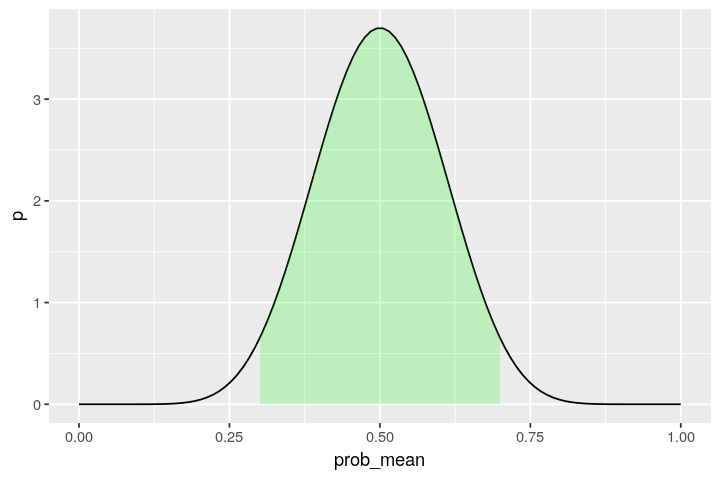

In [137]:
ns<-10
nt<-20

alpha <- ns+1
beta  <- nt-ns+1

fillarea<-function(p){
            
    out<-dbeta(p,alpha,beta)
    out[p<qbeta(0.025,alpha,beta)]<-NA
    out[p>qbeta(0.975,alpha,beta)]<-NA
    out
}

df_beta_test<-data.frame(prob_mean=seq(0,1,length.out=100))
df_beta_test$p<-dbeta(df_beta_test$prob_mean,alpha,beta)
ggplot(df_beta_test,aes(x=prob_mean,y=p))+geom_line()+
    stat_function(fun=fillarea, geom="area",fill="green",alpha=0.2)

Comparación de test binomial y distribución beta:

In [138]:
ns=10
nt=100
binom.test(ns,nt)$conf.int
c(qbeta(0.025,ns+1,nt-ns+1),qbeta(0.975,ns+1,nt-ns+1))

[1] 0.04900469 0.17622260
attr(,"conf.level")
[1] 0.95

[1] 0.05563722 0.17455283

In [139]:
ns=1
nt=5
binom.test(ns,nt)$conf.int
c(qbeta(0.025,ns+1,nt-ns+1),qbeta(0.975,ns+1,nt-ns+1))

[1] 0.005050763 0.716417936
attr(,"conf.level")
[1] 0.95

[1] 0.04327187 0.64123458